## 'Programming for Data Analysis' project

## Contents

1. [Problem statement](#Problem-statement)<br>
   i. [Requirements](#Requirements)<br>
2. [Method](#Method)<br>
3. [Choose Dataset](#Choose-Dataset)<br>
4. [Import Libraries](#Import-Libraries)<br>
5. [Examine the dataset](#Examine-the-dataset)<br>
    a. [Read in the dataset](#Read-in-the-dataset)<br>
    b. [First five rows](#First-five-rows)<br>
    c. [Last five rows](#Last-five-rows)<br>
    d. [Data types of variables](#Data-types-of-variables)<br>
    e. [Basic statistics](#Basic-statistics)<br>
6. [Format dataset](#Format-dataset)<br>
7. [Visual summary of variables](#Visual-summary-of-variables)<br>
8. [Probability distributions of variables](#Probability-distributions-of-variables)<br>
    a. [Fixed acidity](#Fixed-acidity)<br>
    b. [Volatile acidity](#Volatile-acidity)<br>
    c. [Citric acid](#Citric-acid)<br>
    d. [Residual sugar](#Residual-sugar)<br>
    e. [Chlorides](#Chlorides)<br>
    f. [Free sulfur dioxide](#Free-sulfur-dioxide)<br>
    g. [Total sulfur dioxide](#Total-sulfur-dioxide)<br>
    h. [Density](#Density)<br>
    j. [pH](#pH)<br>
    k. [Sulphates](#)<br>
    l. [Alcohol](#)<br>
    m. [Quality](#Quality)<br>
9. [Variables and quality](#Variables-and-quality)<br>
    a. [Observations of variables versus quality](#Observations-of-variables-versus-quality)<br>
    b. [A different way to observe variables versus quality](#A-different-way-to-observe-variables-versus-quality)<br>
    c. [Correlation between variables and quality](#Correlation-between-variables-and-quality)<br>
19. [Conclusion](#Conclusion)
20. [References](#References)<br>

## Problem statement

Create a data set by simulating a real-world phenomenon of
your choosing.<br> You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life.<br> 
Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

### Requirements

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. 

2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3.  Synthesise/simulate a data set as closely matching their properties as possible.

4.  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Method

For this project, a dataset is needed to synthesise the data from. Regardless of what the real-world phenomenon might be, there more than likely will be a dataset related to the phenomenon.
The following process will be used to work through the project.

1. Choose dataset
2. Import all necessary Python libraries for analysis, plotting, etc
3. Examine dataset - variable types, missing rows, etc
4. Format dataset as needed
5. Visual summary of variables - see where the 'bulk' of information is.
6. Determine probability distribution of each variable in the dataset
7. Generate synthetic data from each variable
8. Check synthetic data has the same probability distribution as original data

## Choose Dataset

For this project, the dataset of portuguese red wine will be used - for the simple fact that I like red wine and want to know what makes a good wine.

The dataset will be in a csv (comma-seperated value) format.

## Import Libraries

Import all the libraries needed for the project.

As the data is in tabular format we need:
- Pandas and Numpy for working with tabular data and numerical arrays
- Matplotlib and seaborn for visualising the data
- Distfit or Fitter to determine the probability distribution of variables
- Scipy to generate the synthetic data

In [112]:
import pandas as pd
import numpy as np
from numpy import random

# Import matplotlib and seaborn to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# distfit is used to find the type of distribution
from distfit import distfit

# Fitter is another library to find the distribution
from fitter import Fitter, get_common_distributions, get_distributions

# scipy to generate synthetic data - import statistics and probability distribution libraries
from scipy.stats import lognorm
from scipy.stats import powerlaw
from scipy.stats import cauchy
from scipy import stats

## Examine the dataset

The dataset is read in, and the data summary observed.
Then the top 10/last 10 rows can be seen, as information about all the data types of each variables, i.e. are they strings, integers, floating-point numbers, etc.

From there, basic statistics can be generated and the dataset can be cleaned up by removing any duplicate or unnecessary columns.

### Read in the dataset

Read in the dataset and see the first five/last five rows.

In [2]:
# Read in the csv file - note that the csv is in the same folder as this notebook
df = pd.read_csv('WineQT.csv')
df

# To-do:
# Run command to check for missing data
# Re-format text above to put in bullet points so that it's easier to read.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### First five rows

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Last five rows

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


### Data types of variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Basic statistics

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Format dataset

Drop the Id column as it's not necessary to reference the rows and/or columns.

In [7]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Visual summary of variables

Below, all 12 variables will be plotted. Note how *quality* has been left in, but whilst all the other variables are some type of chemical compound, *quality* is arbitrary and has been determined:
- either manually
- through a relationship or pattern between one or more variables.

In [8]:
wine_variables = df.columns.values.tolist()
wine_variables

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

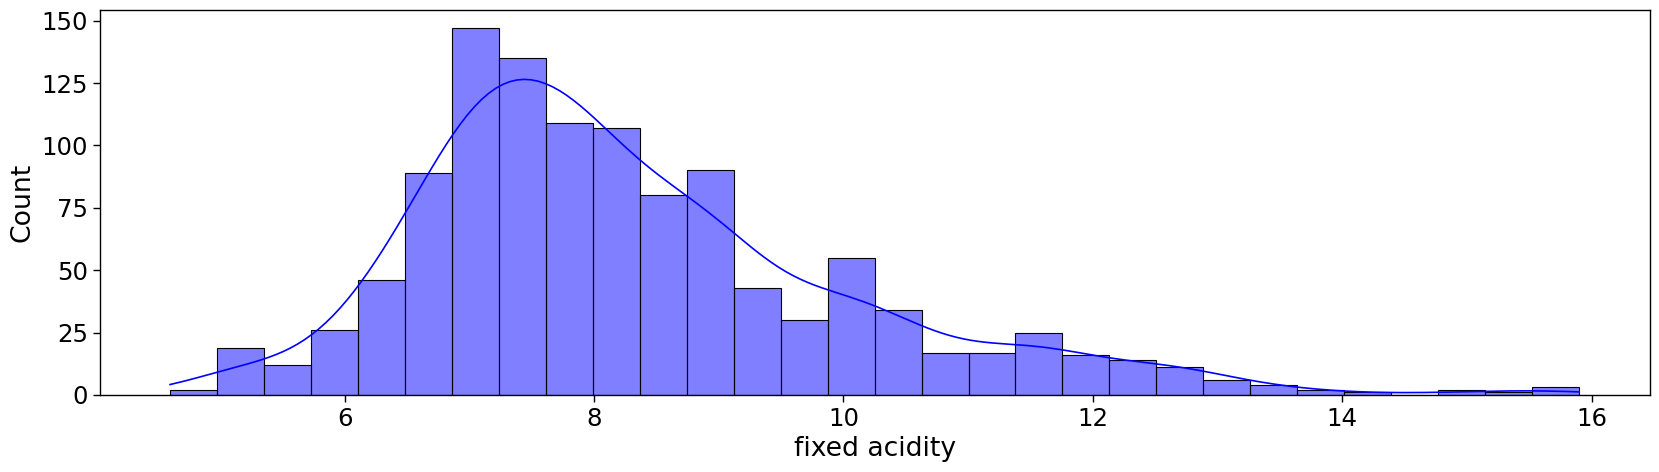

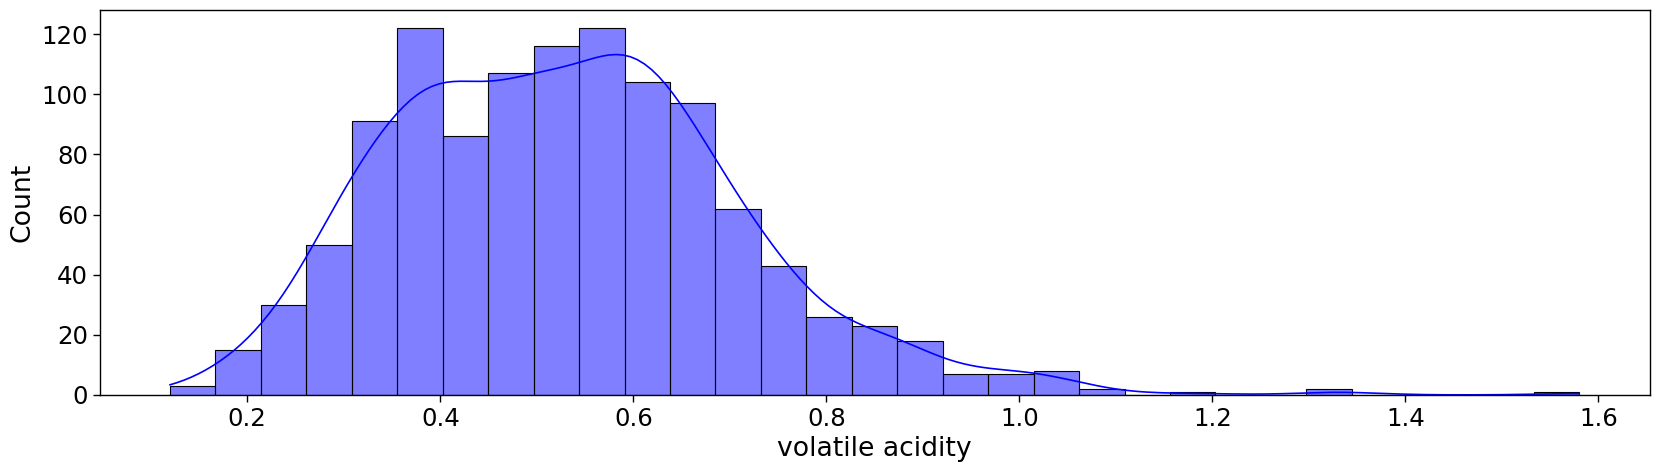

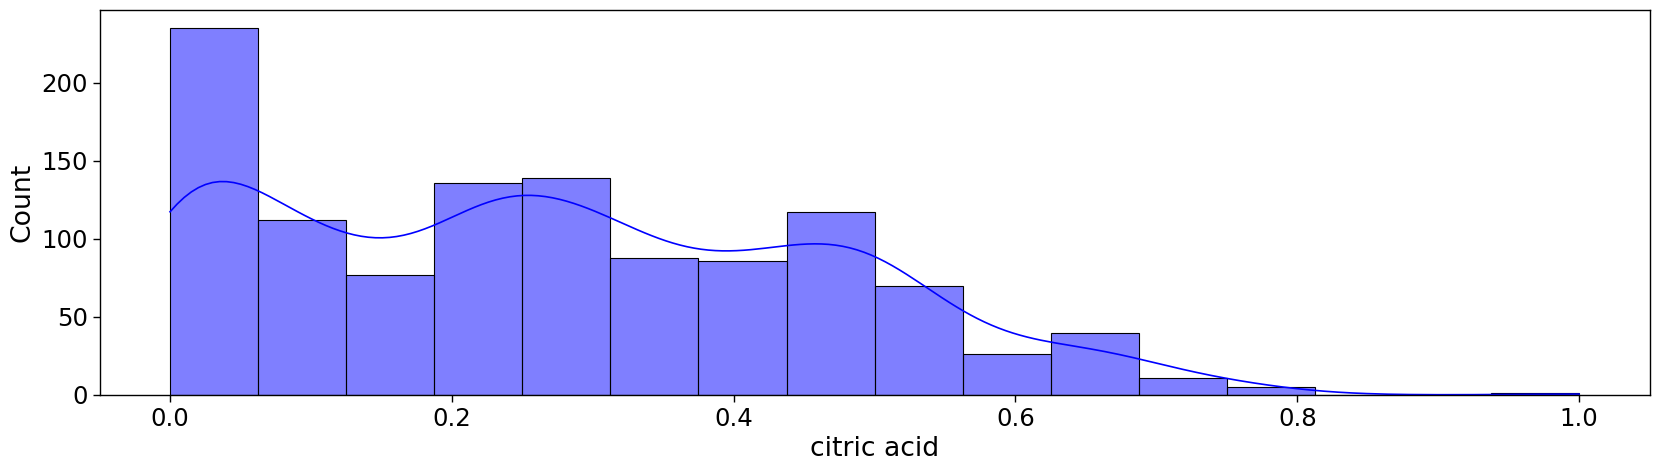

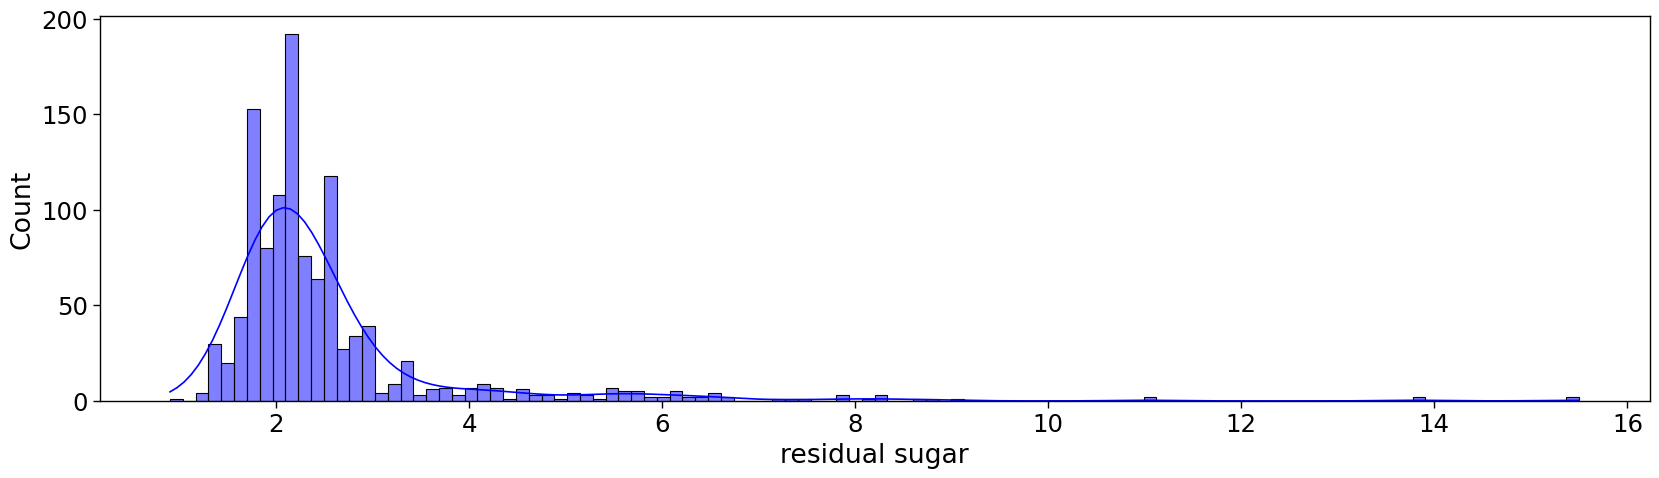

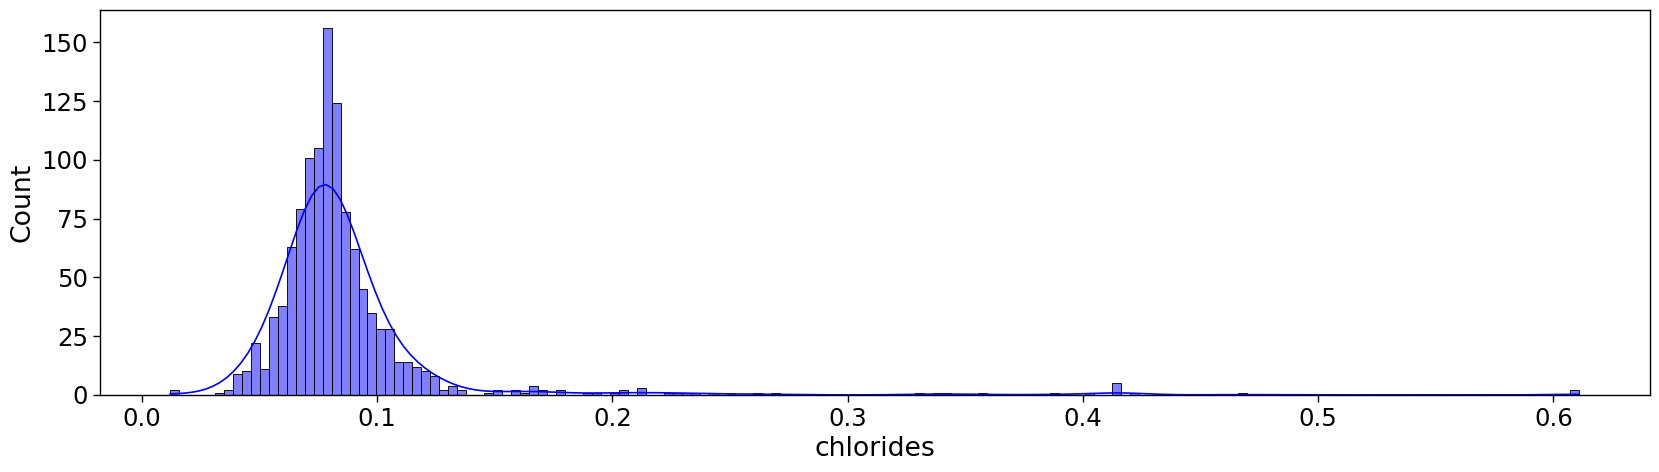

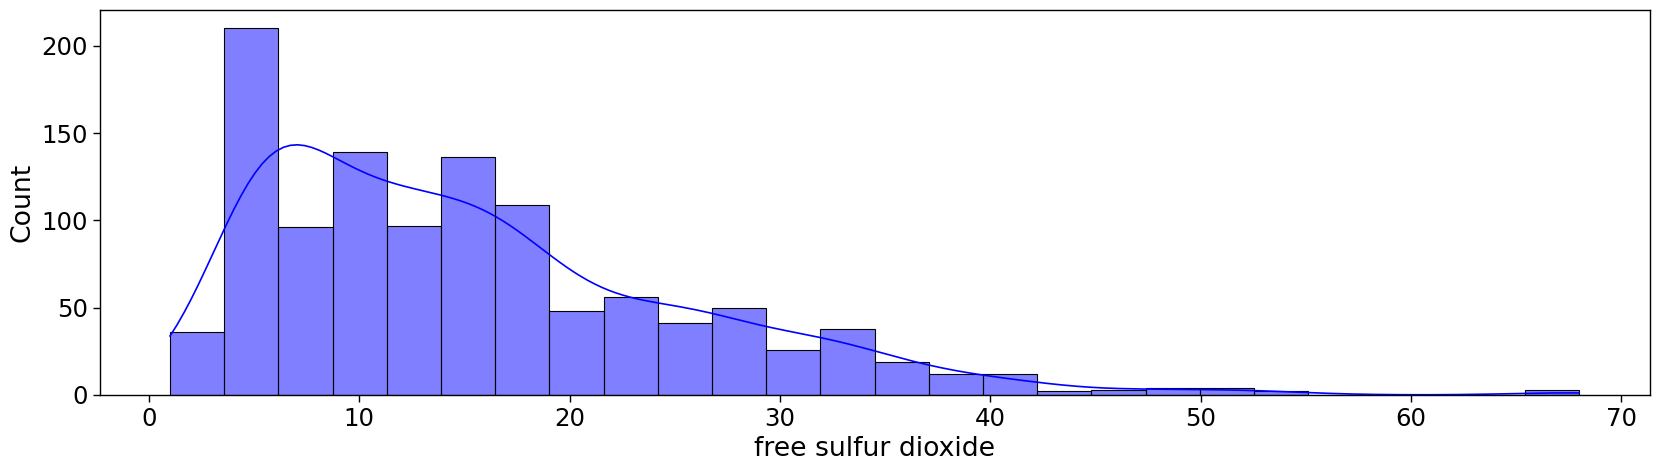

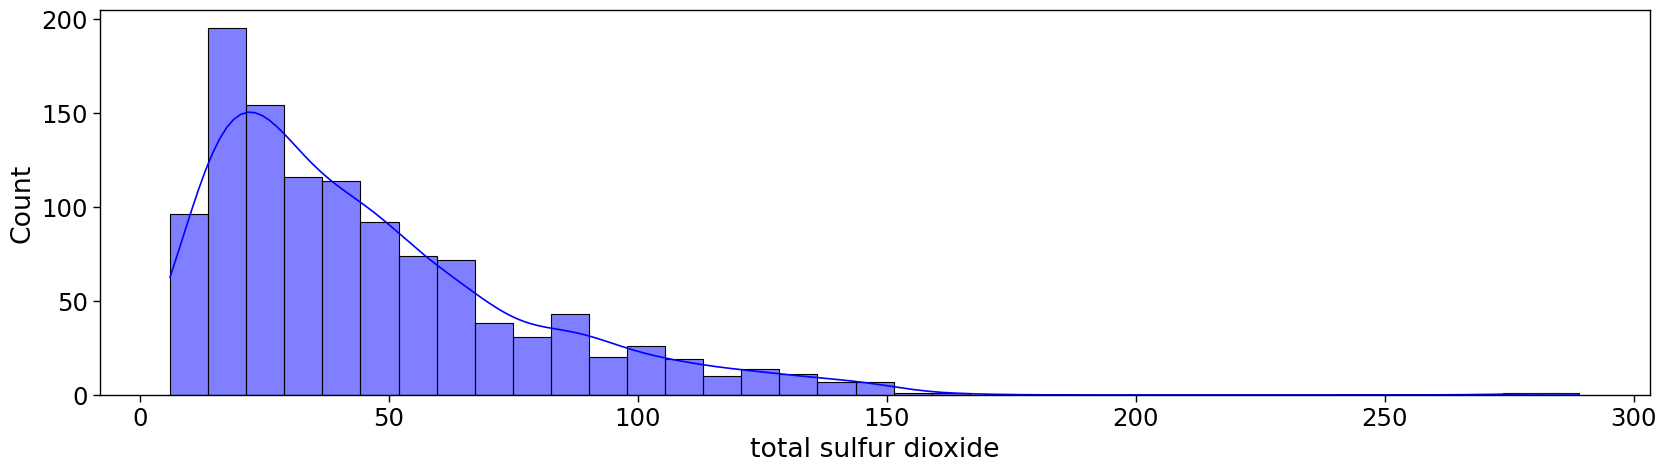

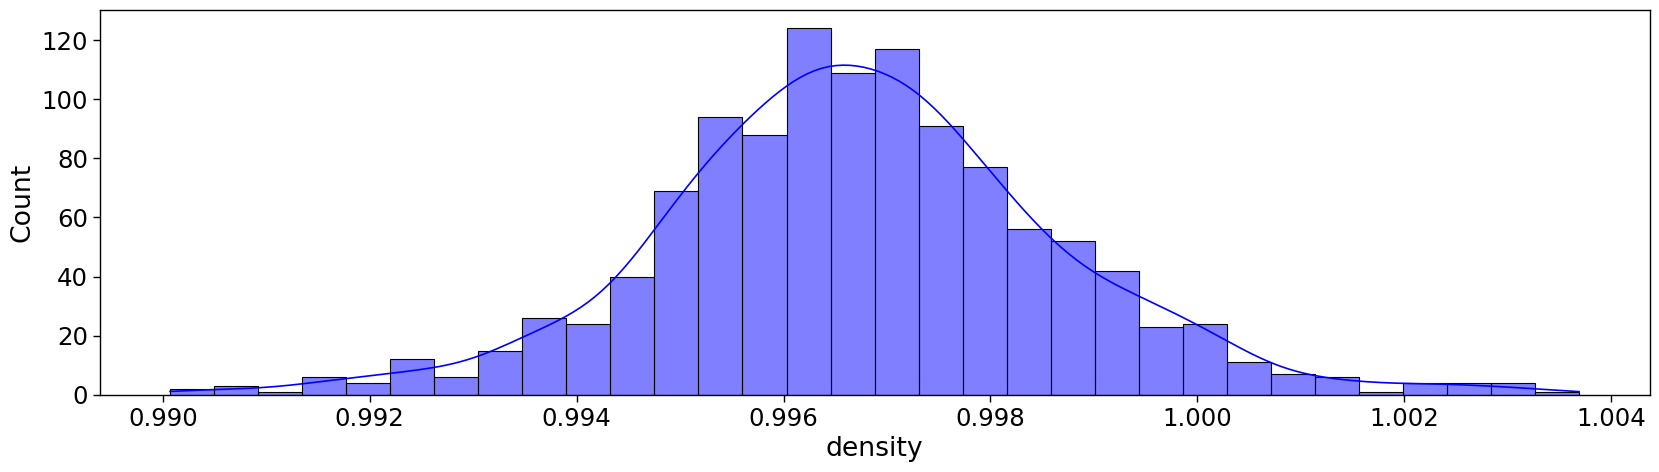

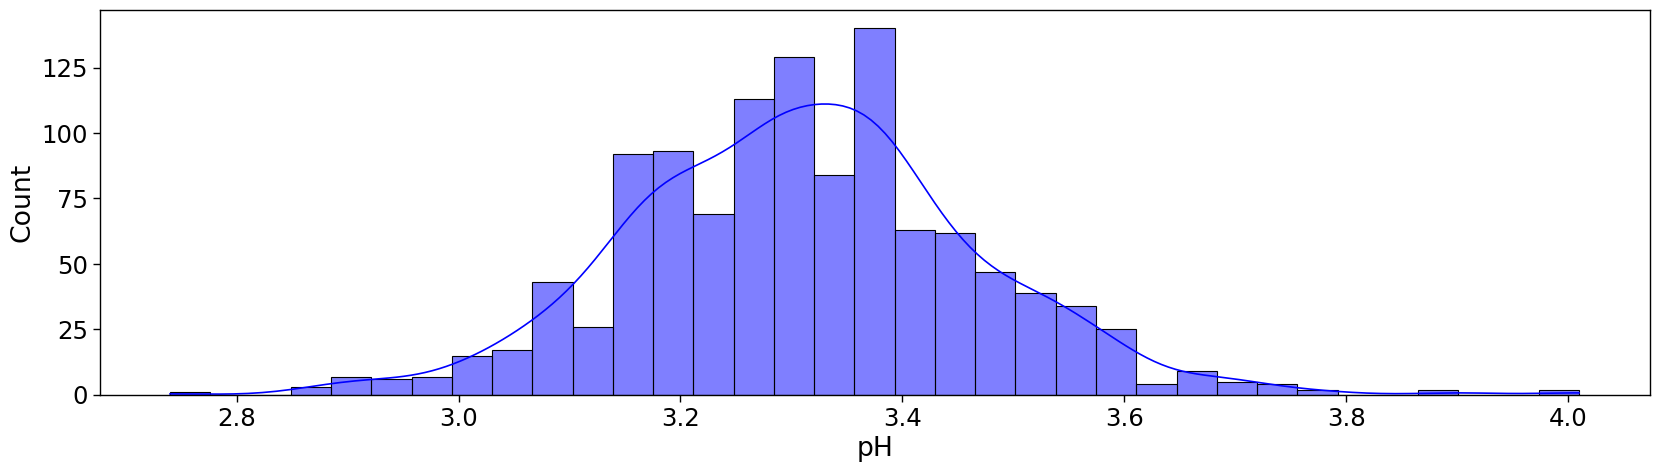

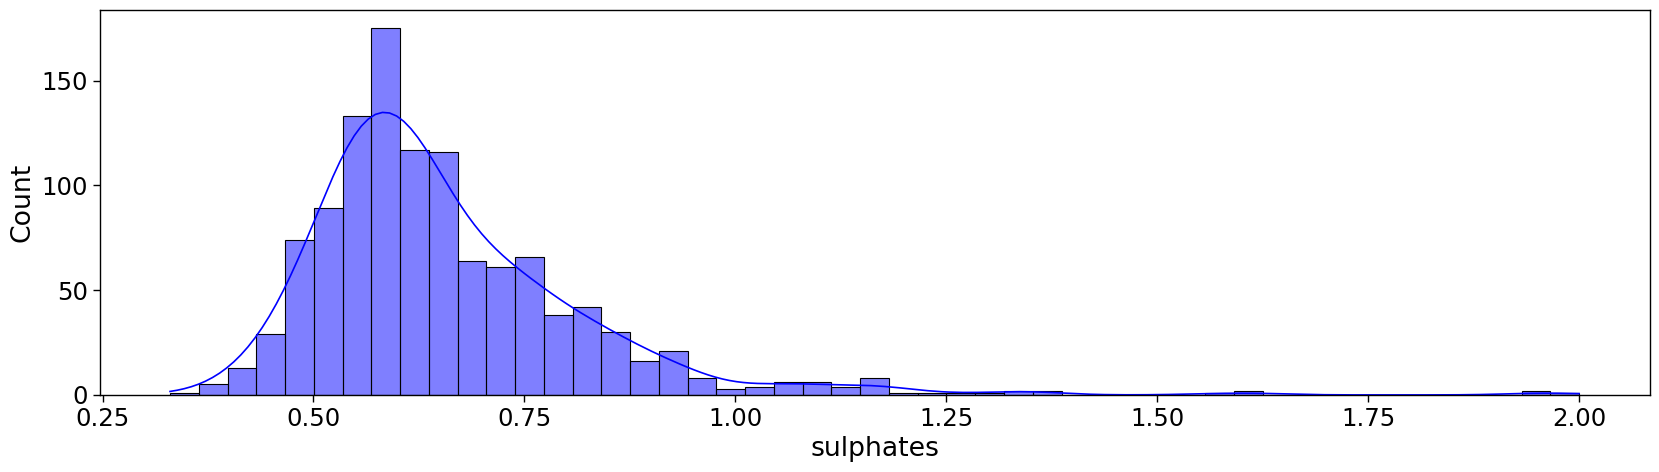

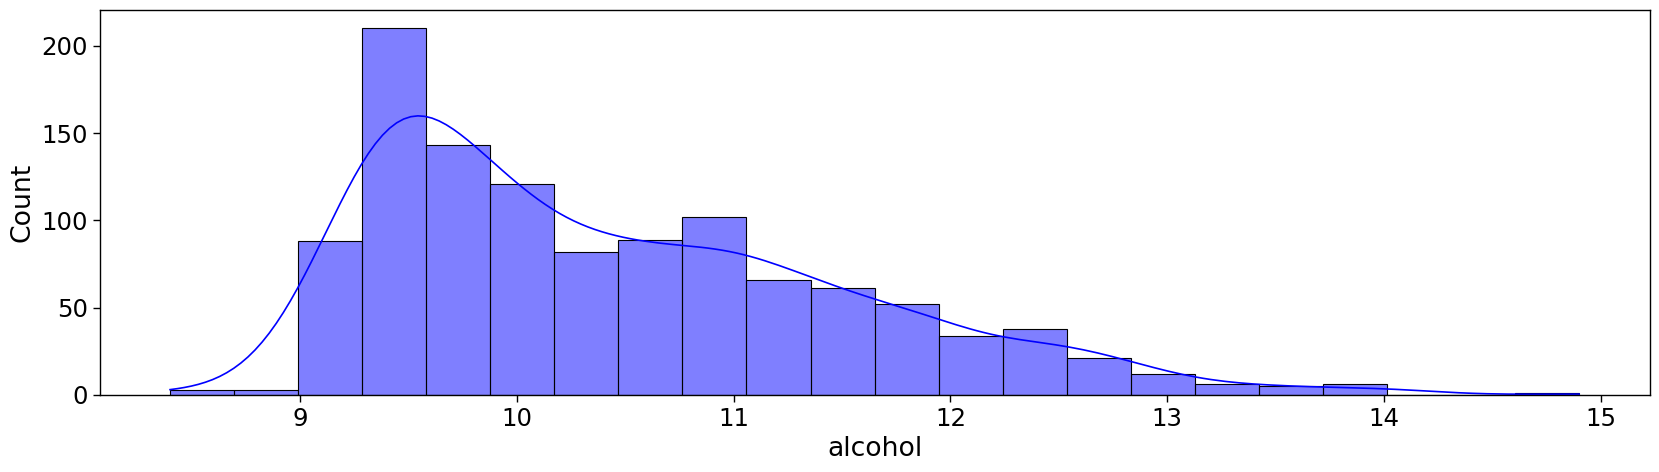

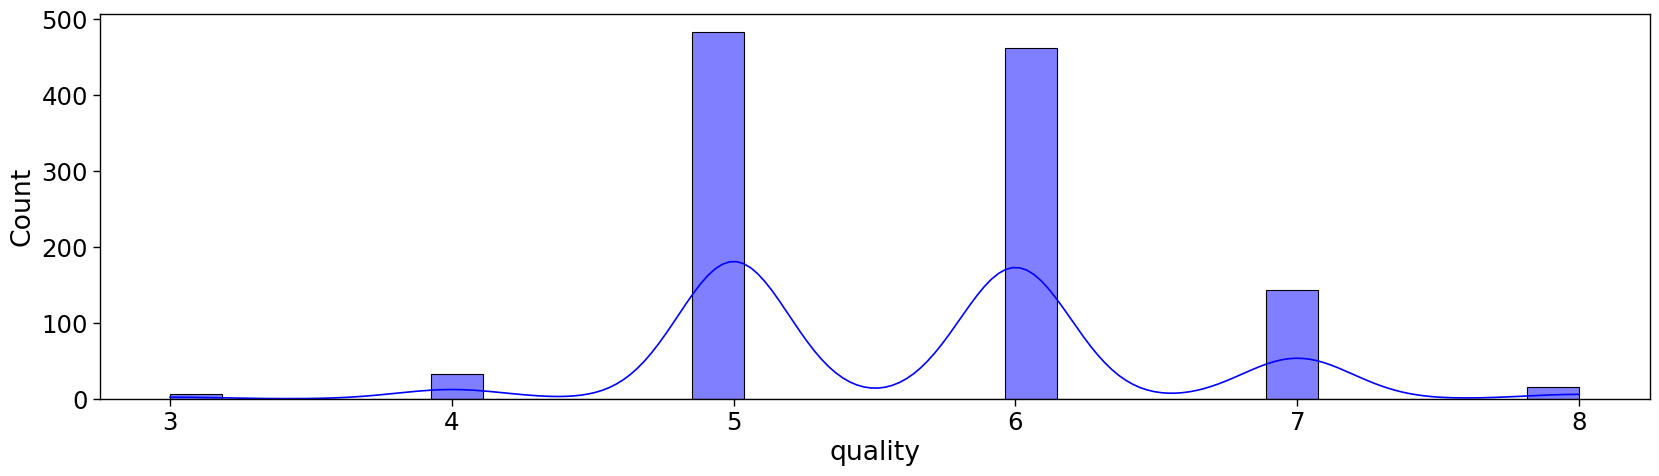

In [9]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue',kde=True)
    #plt.show()

## Probability distributions of variables

The method to determine the probability distributions will be as follows:
1. Plot a histogram of the variables data
2. Determine the likely probability distributions using the ***Fitter*** library
3. Determine the best method by using 'sum squared error' on the likely distributions
4. Use the generated parameters to generate synthetic data for the variable
5. Check that the generated synthetic data has the same probability distribution as the variable.
6. Append the checked, synthesised data to a dataframe 

The synthetic data generated will be approximately equal in number to the 'real' data - 1143 rows.
The reasoning behind this is that machine learning models typically seperate the data from anywhere in the range 50/25/25 to 75/15/10 - so double the amount of original data should be ample for any developments.

For naming of synthesised variables, it will be the initial of the variable followed by *_synth* to denote that it's the synthesised variable.

## Fixed acidity

Analyse the *fixed acidity* variable and determine it's probability distribution using the 'Fitter' library

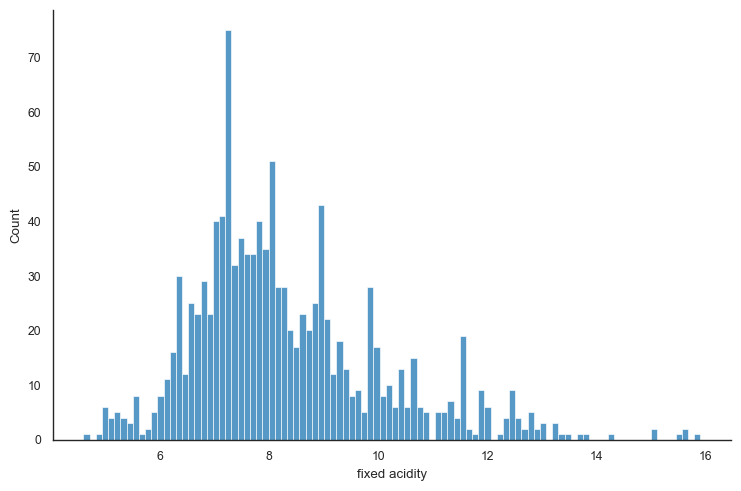

In [10]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="fixed acidity", kind="hist", bins=100, aspect=1.5)

Determine the probability distribution using the 'Fitter' library.<br>
The values from the first column will be passed through the library (see below):

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.28it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.282317,678.293554,-9472.788689,inf,0.050560,5.592020e-03
chi2,0.299474,686.607150,-9405.354595,inf,0.057939,8.906417e-04
gamma,0.299475,686.607061,-9405.353280,inf,0.057939,8.905541e-04
cauchy,0.345093,681.612823,-9250.335602,inf,0.109318,2.373896e-12
rayleigh,0.386282,inf,-9121.456926,inf,0.152453,1.164303e-23


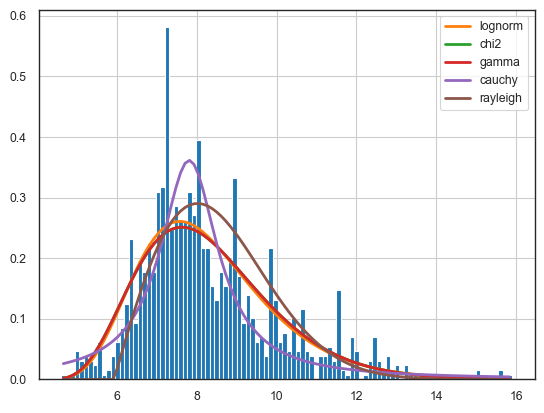

In [11]:
fixedAcidity = df["fixed acidity"].values
f = Fitter(fixedAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [12]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.3111165908311433,
  'loc': 2.894249875615288,
  'scale': 5.159301783923943}}

In [13]:
# Reminder about the variables from the first column:
# Get kurtosis, skew and variance
kurt = df["fixed acidity"].kurt()
print(f'Kurtosis is :\n{kurt}')

std_fa = df["fixed acidity"].std()
print(f'\nThe standard deviation is: \n{std_fa}')

var_fa = (std_fa)**2 
print(f'\nThe variance is: \n{var_fa}')

skew_fa = df["fixed acidity"]
print(f'\nThe skew is: \n{skew_fa.skew()}')

mean_fa = df["fixed acidity"].mean()
print(f'\nThe mean is: \n{mean_fa}')

Kurtosis is :
1.3846135487241824

The standard deviation is: 
1.747595017169539

The variance is: 
3.054088344035801

The skew is: 
1.0449299563724053

The mean is: 
8.311111111111119


### Synthesised data: fixed acidity

Now that the probability distribution is known, data can be synthesised with the identical probability distribution of the fixed acidity data and the same number of data points (1143).

In [14]:
# reminder of original variable.
fa = df["fixed acidity"].describe()
fa

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

mean: 8.3111
std:  1.7476


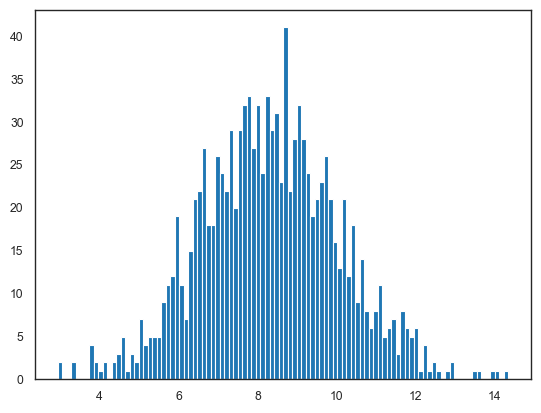

In [15]:
# fa_synth is the fixed acidity, synthesised data
fa_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
fa_synth = (fa_synth - np.mean(fa_synth)) / np.std(fa_synth)

# get desired mean + std
fa_synth = (fa_synth * std_fa) + mean_fa

plt.hist(fa_synth, bins=100)
print(f"mean: {np.mean(fa_synth):.4f}")
print(f"std:  {np.std(fa_synth):.4f}")

Check generated data matches the original probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.37it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.055445,658.262888,-11333.185770,inf,0.011325,0.998241
gamma,0.055458,658.337088,-11332.904901,inf,0.011375,0.998118
norm,0.056381,658.954554,-11321.082681,inf,0.014329,0.970397
chi2,0.057728,654.755869,-11287.053952,inf,0.020779,0.698975
cauchy,0.161879,629.018854,-10115.543685,inf,0.074078,0.000007


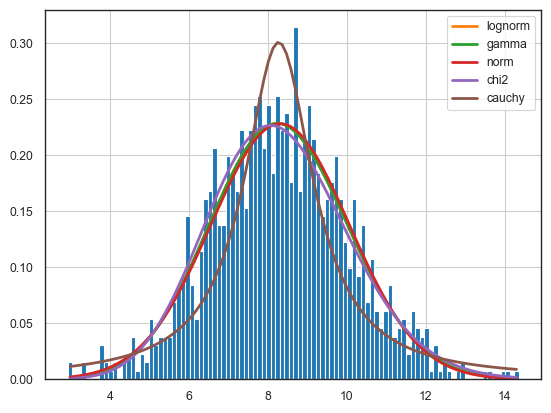

In [16]:
f = Fitter(fa_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

And so we can see that the synthesised data has the same probability distribution as the original and so we can expect similar behaviours when analysing the variable.<br>

### Append data

Now we need to create a new dataframe and insert the synthesised data into it.

In [17]:
df2 = pd.DataFrame(fa_synth)
print(df2)

             0
0     9.654646
1     7.983757
2     7.656000
3     8.627140
4     7.760751
...        ...
1138  5.394586
1139  7.478896
1140  8.265878
1141  9.526761
1142  8.613713

[1143 rows x 1 columns]


In [18]:
# Change the data type of the col header to string so that it can be edited.
df2.columns = df2.columns.astype("str")

df2.rename(columns = {"0":"Fixed Acidity"}, inplace = True)
print(df2)

      Fixed Acidity
0          9.654646
1          7.983757
2          7.656000
3          8.627140
4          7.760751
...             ...
1138       5.394586
1139       7.478896
1140       8.265878
1141       9.526761
1142       8.613713

[1143 rows x 1 columns]


Now the process is continued with each variable, determinining the probability distribution and generating data to match the distribution.

## Volatile acidity

Analyse the Volatile Acidity variable and determine it's probability distribution using the 'Fitter' library

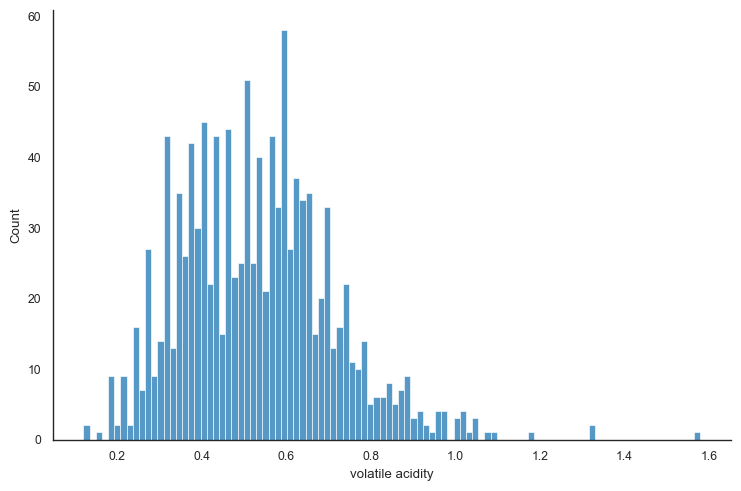

In [19]:
# Plot histograms of the data
sns.set_style('white')
sns.set_context("paper", font_scale=1)
sns.displot(data=df, x="volatile acidity", kind="hist", bins=100, aspect=1.5)

Use the Fitter library to determine the probability distribution:

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.84it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,16.189125,440.245925,-4844.709025,inf,0.043578,2.527282e-02
gamma,16.189127,440.246068,-4844.708847,inf,0.043577,2.527335e-02
lognorm,16.332038,424.769135,-4834.663216,inf,0.045014,1.887108e-02
norm,16.567258,710.219431,-4825.360095,inf,0.050588,5.555206e-03
exponpow,22.802897,899.257191,-4453.176758,inf,0.085841,8.912493e-08


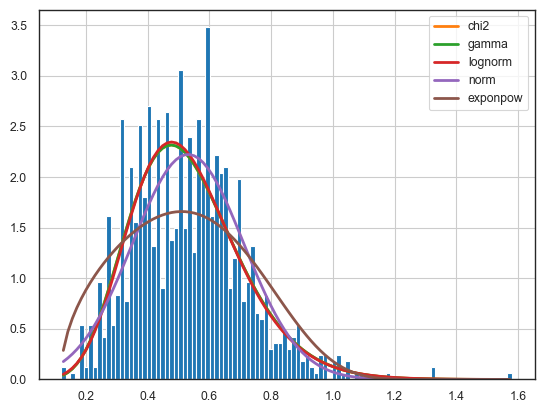

In [20]:
volatileAcidity = df["volatile acidity"].values
f = Fitter(volatileAcidity,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [21]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 21.28150456047614,
  'loc': -0.05406603530302846,
  'scale': 0.02750766899560908}}

However, as the chi squared distribution is used to measure the fit between an observed distribution and a theoretical one, the gamma distribution will be used instead to synthesise the data.<br>
The reason behind this is if one was to look at the ***sumsquare_error*** column above, it can be seen that there is just 0.000002 of a difference between the chisquare and the gamma distribution.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

### Synthesised data: Volatile acidity

In [32]:
# Reminder of the statistics of the original variable.
df["volatile acidity"].describe()

count    1143.000000
mean        0.531339
std         0.179633
min         0.120000
25%         0.392500
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [46]:
mean_va, std_va = 0.5313, 0.1796
shape = (mean_va**2) / (std_va**2)
scale = (std_va**2)/mean_va
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 8.751187060084025
The scale is: 0.06071176359872013


mean: 0.5313
std:  0.1796


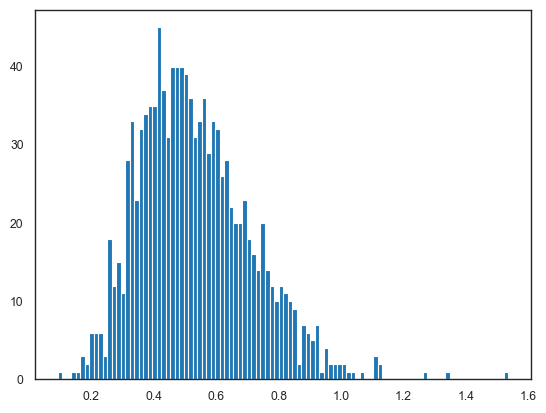

In [49]:
# Generate a random gamma distribution using the shape and scale
va_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
va_synth = (va_synth - np.mean(va_synth)) / np.std(va_synth)

# get desired mean + std
va_synth = (va_synth * std_va) + mean_va

plt.hist(va_synth, bins=100)
print(f"mean: {np.mean(va_synth):.4f}")
print(f"std:  {np.std(va_synth):.4f}")

In [50]:
va_synth_min = np.min(va_synth)
va_synth_max = np.max(va_synth)
print(f'The min is : {va_synth_min}')
print(f'The max is : {va_synth_max}')

The min is : 0.0915236215565367
The max is : 1.5359346862902683


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 52.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,2.375333,410.537313,-7038.356831,inf,0.014748,0.961712
gamma,2.375333,410.537803,-7038.356770,inf,0.014748,0.961715
lognorm,2.379279,388.685776,-7036.459622,inf,0.013309,0.985863
rayleigh,2.882983,inf,-6824.013174,inf,0.036195,0.097668
norm,5.815004,630.617767,-6022.066090,inf,0.054646,0.002085


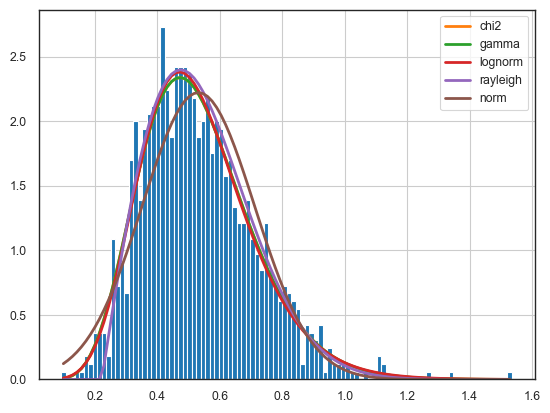

In [51]:
f = Fitter(va_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

The data has been synthesised, and it's probability distribution matches that of the original data, the next stage is to append the data to the new dataframe.

### Append data

In [25]:
# The new dataframe with the synthetic data for 'Fixed Acidity' added.
df2

,Fixed Acidity
0,9.654646
1,7.983757
2,7.656000
3,8.627140
4,7.760751
...,...
1138,5.394586
1139,7.478896
1140,8.265878
1141,9.526761


In [26]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Volatile Acidity'] = va_synth
df2

,Fixed Acidity,Volatile Acidity
0,9.654646,0.853887
1,7.983757,0.310202
2,7.656000,0.375407
3,8.627140,0.732980
4,7.760751,0.445233
...,...,...
1138,5.394586,0.563727
1139,7.478896,0.502475
1140,8.265878,0.722947
1141,9.526761,0.604642


### Citric acid

Analyse the **citric acid** variable and determine it's probability distribution using the 'Fitter' library.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.73it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,62.234366,47.153336,-3305.582183,inf,0.218465,2.224383e-48
exponpow,67.951074,141.976692,-3205.134682,inf,0.121447,3.775495e-15
expon,84.698511,113.546048,-2960.361667,inf,0.143797,4.355640e-21
gamma,94.673607,163.501381,-2826.061788,inf,0.237984,1.922040e-57
rayleigh,99.797291,163.624965,-2772.860507,inf,0.087014,5.592465e-08


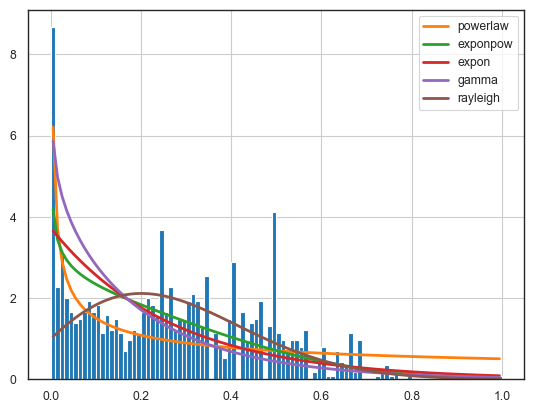

In [27]:
citricAcid = df["citric acid"].values
f = Fitter(citricAcid,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [28]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'powerlaw': {'a': 0.5277051017328287,
  'loc': -7.501749543560782e-28,
  'scale': 1.0730563982022998}}

### Synthesised data: citric acid

In [57]:
# Reminder of statistics for original variable
df["citric acid"].describe()

count    1143.000000
mean        0.268364
std         0.196686
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [100]:
# the value for the a parameter is from the 'fitter' library
a = 0.5277051017328287
samples = 1143
#ca_synth = np.random.power(a, samples)
#ca_synth
#plt.plot(ca_synth)

In [104]:
# Location and scale determined from the 'Fitter' analysis of the original variable
location = -7.501749543560782e-28
scale = 1.0730563982022998
ca_synth = powerlaw.rvs(a, loc=location, scale = scale, size=1143)

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.31it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,8.039021,57.139198,-5644.846046,inf,0.041842,3.551489e-02
exponpow,15.583077,95.646940,-4888.319272,inf,0.059712,5.517709e-04
chi2,17.193153,113.157383,-4775.932944,inf,0.069812,2.741042e-05
expon,36.188180,100.392406,-3932.329400,inf,0.072991,9.666279e-06
gamma,41.614299,169.437405,-3765.598006,inf,0.196375,4.271679e-39


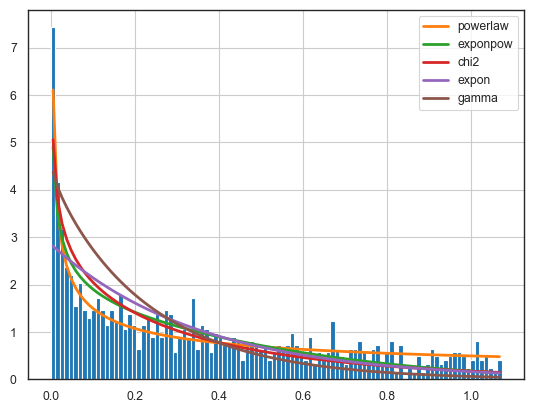

In [92]:
f = Fitter(r,
           distributions=get_common_distributions())
f.fit()
f.summary()

The probability distribution of the generated synthetic data matches that of the original data, so the next stage is to add a column to the dataframe with the new data.

### Append data

In [ ]:
# The new dataframe with the previous two variables added
df2

In [106]:
df2['Citric Acid'] = ca_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid
0,9.654646,0.853887,0.252770
1,7.983757,0.310202,0.180517
2,7.656000,0.375407,0.341703
3,8.627140,0.732980,0.118825
4,7.760751,0.445233,0.930925
...,...,...,...
1138,5.394586,0.563727,0.036101
1139,7.478896,0.502475,0.297557
1140,8.265878,0.722947,0.582556
1141,9.526761,0.604642,0.259037


### Residual sugar

Analyse the **residual sugar** variable and determine it's probability distribution using the 'Fitter' library.

In [132]:
# Reminder of statistics for original variable
df["residual sugar"].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.40it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.518801,1050.559106,-8784.326545,inf,0.120677,5.803058e-15
lognorm,0.759073,1375.833145,-8342.286267,inf,0.125637,3.475819e-16
chi2,1.098216,1761.019465,-7920.124538,inf,0.174267,7.923811e-31
rayleigh,1.670072,2723.474600,-7448.043981,inf,0.280315,6.315116e-80
norm,2.079499,2964.364552,-7197.429327,inf,0.258690,5.950062e-68


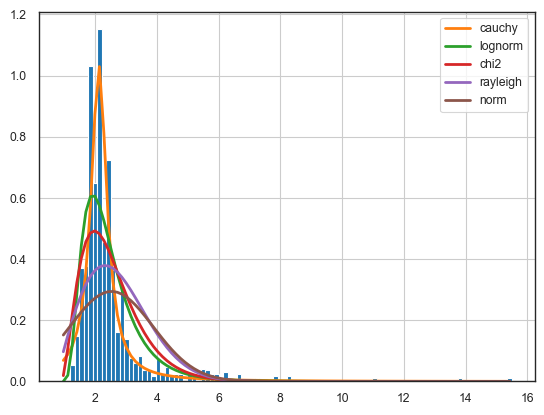

In [150]:
residualSugar = df["residual sugar"].values
f = Fitter(residualSugar,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [108]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 2.126245584104908, 'scale': 0.3085391912360501}}

### synthesised data: residual sugar

In [109]:
# Get the basic stats for residual sugar
df["residual sugar"].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [110]:
std_rs = df["residual sugar"].std()
mean_rs = df["residual sugar"].mean()

mean: 2.5322
std:  1.3559


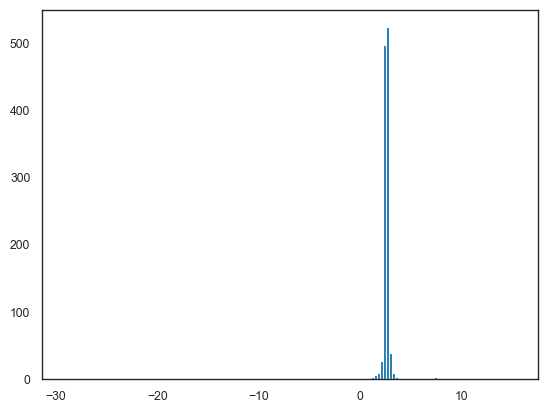

In [137]:
#resSug = mu + sigma * np.random.default_rng().standard_cauchy(1143)
resSug = cauchy.rvs(loc=0.07823790817297994, scale=0.009102579819038505, size=1143, random_state=None)

#Below is testing
# standardisation to get mean = 0, std = 1
resSug = (resSug - np.mean(resSug)) / np.std(resSug)

# get desired mean + std
resSug = (resSug * std_rs) + mean_rs

# truncate distribution so it plots well
#resSug = s[(s>0.9) & (s<15.5)]  

plt.hist(resSug, bins=150)
print(f"mean: {np.mean(resSug):.4f}")
print(f"std:  {np.std(resSug):.4f}")

In [138]:
print(np.min(resSug))
print(np.max(resSug))

-29.183837675315793
15.287954977966947


Clearly, you can't have negative values for sugar as it's a quantity. The minimum and maximum values for residual sugar are positive - so an alternative way of synthesising the data needs to be explored.<br>


Trying to change the data by applying log transformations and seeing if that can help.
The process will be: 
- log transform of original data
- determine probability
- generate data
- reverse the log transform to (in theory) get the data that matches cauchy distribution.

In [ ]:
# Testing using logs

0.6418538861723948
2.803360380906535


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.11it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,42.871643,442.679808,-3738.615993,inf,0.105011,1.984833e-11
lognorm,45.082123,587.062180,-3674.110040,inf,0.103584,3.937195e-11
gamma,47.502252,625.653750,-3614.341045,inf,0.126725,1.846186e-16
rayleigh,49.828761,inf,-3566.729664,inf,0.172113,4.469305e-30
norm,57.300171,829.779168,-3407.039693,inf,0.185331,7.727706e-35


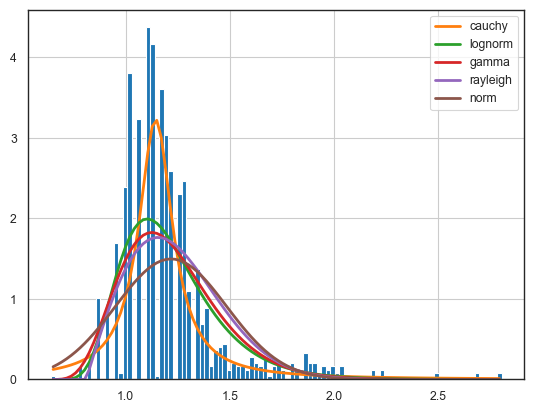

In [140]:
# Checking to see whether transforming the data using logs will change the probability distribution
residualSugar2 = df["residual sugar"].apply(np.log1p).values
print(np.min(residualSugar2))
print(np.max(residualSugar2))
#residualSugar2 = residualSugar2.values
f = Fitter(residualSugar2, distributions=get_common_distributions())
f.fit()
f.summary()

In [ ]:
# Above only works for lognormal distributions - as the Cauchy distribution is very skewed, 
# it doesn't seem to be working.

In [ ]:
# Trying sklearn to see if that does anything
from sklearn.preprocessing import MinMaxScaler

residualSugar2 = df["residual sugar"]

scaler=MinMaxScaler(feature_range=(0,1))

residualSugar2=scaler.fit_transform(np.array(residualSugar2).reshape(-1,1))


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.25it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,42.871643,442.679808,-3738.615993,inf,0.105011,1.984833e-11
lognorm,45.082123,587.062180,-3674.110040,inf,0.103584,3.937195e-11
gamma,47.502252,625.653750,-3614.341045,inf,0.126725,1.846186e-16
rayleigh,49.828761,inf,-3566.729664,inf,0.172113,4.469305e-30
norm,57.300171,829.779168,-3407.039693,inf,0.185331,7.727706e-35


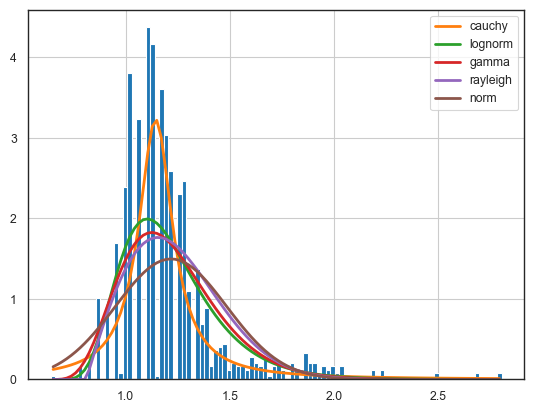

In [141]:
f = Fitter(residualSugar2, distributions=get_common_distributions())
f.fit()
f.summary()

So log transformation doesn't make a difference - and in fact, through exploring (googling) log transformation only works for normal or variations of normal distributions (see reference).<br>

As the lognormal distribution is the next closest, that's what will now be used to generate synthetic data for the *residual sugar* variable.

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:27<00:00, 13.81s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.759073,1375.833145,-8342.286267,inf,0.125637,3.475819e-16
loguniform,4.151174,inf,-6393.231774,NaN,1.000000,0.000000e+00


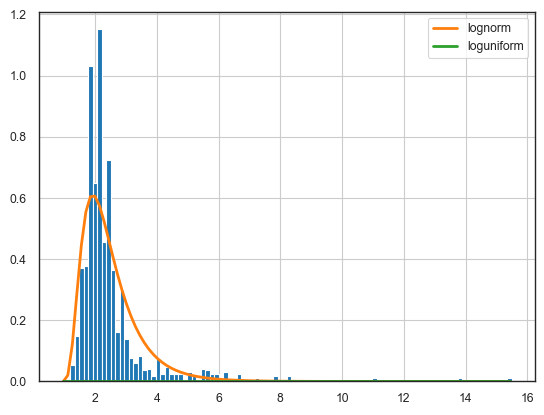

In [174]:
import fitter
residualSugar = df["residual sugar"].values
f = Fitter(residualSugar)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [175]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.5271574139877518,
  'loc': 0.8462439352615688,
  'scale': 1.4252355056221546}}

mean: 2.5322
std:  1.3559


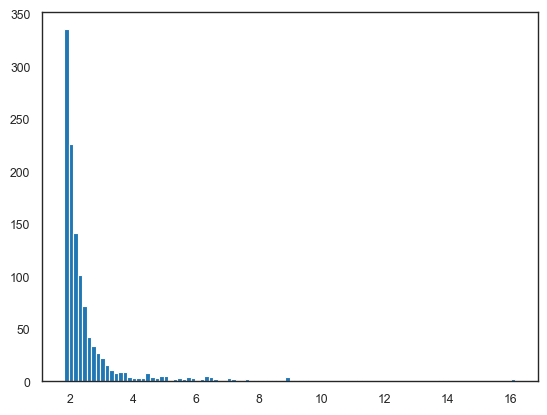

In [178]:
# rs_synth is the residual sugar, synthesised data
#rs_synth = lognorm.rvs(0.025, 0, 1, size=1143)
rs_synth = np.random.lognormal(mean_rs, std_rs, 1143)

# standardisation to get mean = 0, std = 1
rs_synth = (rs_synth - np.mean(rs_synth)) / np.std(rs_synth)

# get desired mean + std
rs_synth = (rs_synth * std_rs) + mean_rs

plt.hist(rs_synth, bins=100)
print(f"mean: {np.mean(rs_synth):.4f}")
print(f"std:  {np.std(rs_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.21s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.111904,1099.040420,-10530.507040,inf,0.020983,6.873598e-01
gamma,0.499298,1473.472959,-8821.082187,inf,0.111528,7.721634e-13
chi2,0.805793,1145.717574,-8274.014781,inf,0.148047,2.483180e-22
expon,0.928277,1924.536448,-8119.318716,inf,0.172103,4.506609e-30
cauchy,1.349679,1208.355064,-7691.503014,inf,0.221565,9.161139e-50


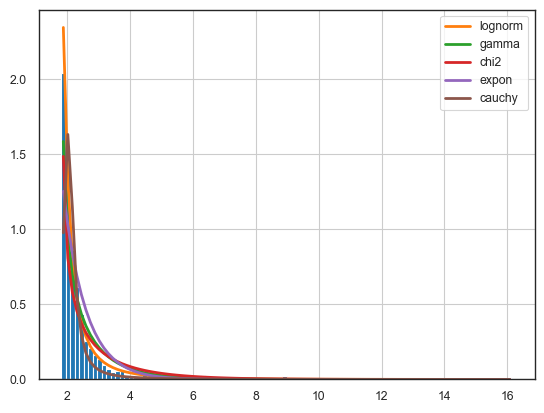

In [180]:
f = Fitter(rs_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [181]:
# Get min and max
print(np.min(rs_synth))
print(np.max(rs_synth))

1.8100617287358516
16.148305280093485


Minimum and maximum values are within range as the standard deviation and mean were used.<br>

Now all that's left is appending the data to the dataframe.

### Append data

In [183]:
# The new dataframe with the previous three variables added
df2

,Fixed Acidity,Volatile Acidity,Citric Acid
0,9.654646,0.853887,0.252770
1,7.983757,0.310202,0.180517
2,7.656000,0.375407,0.341703
3,8.627140,0.732980,0.118825
4,7.760751,0.445233,0.930925
...,...,...,...
1138,5.394586,0.563727,0.036101
1139,7.478896,0.502475,0.297557
1140,8.265878,0.722947,0.582556
1141,9.526761,0.604642,0.259037


In [184]:
df2['Residual Sugar'] = rs_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar
0,9.654646,0.853887,0.252770,1.975630
1,7.983757,0.310202,0.180517,1.928074
2,7.656000,0.375407,0.341703,2.226039
3,8.627140,0.732980,0.118825,2.057216
4,7.760751,0.445233,0.930925,3.335788
...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253
1139,7.478896,0.502475,0.297557,1.955582
1140,8.265878,0.722947,0.582556,1.875342
1141,9.526761,0.604642,0.259037,3.271293


### Chlorides

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.63it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,71.952969,447.308356,-3146.768192,inf,0.070328,2.321774e-05
lognorm,513.168095,1380.419177,-894.199539,inf,0.135968,6.834813e-19
chi2,708.492425,1893.760583,-525.541000,inf,0.174286,7.800896e-31
rayleigh,993.381635,inf,-146.276360,inf,0.273945,2.721445e-76
norm,1363.155302,3175.822130,215.417362,inf,0.258152,1.146881e-67


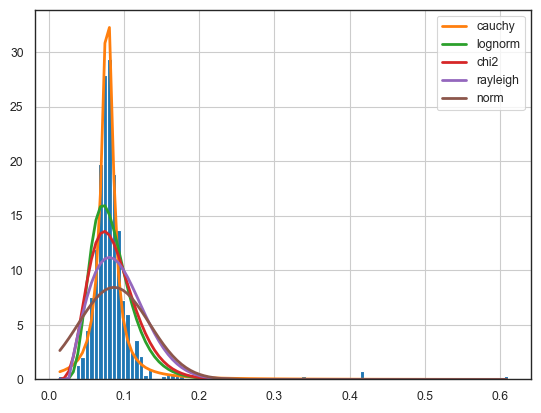

In [185]:
chlorides = df["chlorides"].values
f = Fitter(chlorides,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the distribution is the same as the previous variable (*residual sugar*) the lognormal distribution will be used to generate the synthetic data for the variable instead.

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 22.63it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,513.168095,1380.419177,-894.199539,inf,0.135968,6.834813e-19
loguniform,1027.145760,inf,-93.989661,0.346945,0.146107,9.279199e-22


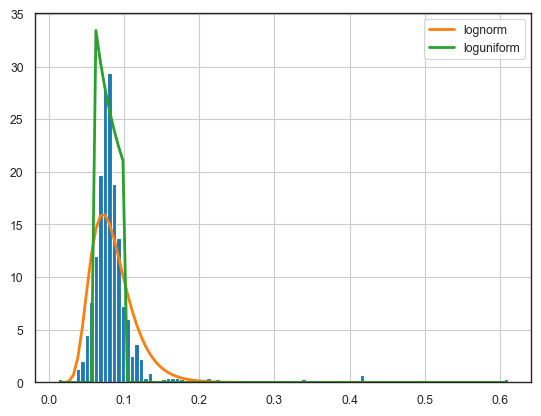

In [186]:
residualSugar = df["chlorides"].values
f = Fitter(residualSugar)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [187]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.3451712715945695,
  'loc': 0.004288945025131343,
  'scale': 0.07664303431783204}}

### synthetic data: chlorides

In [189]:
# reminder of the statistics from the original variable
df.chlorides.describe()

count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [192]:
std_c = df.chlorides.std()
mean_c = df.chlorides.mean()

mean: 0.0869
std:  0.0473


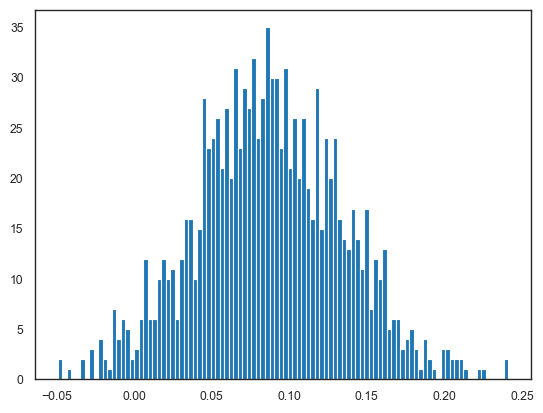

In [201]:
# c_synth is the chlorides, synthesised data
#c_synth = lognorm.rvs(0.025, 0, 1, size=1143)
c_synth = np.random.lognormal(mean_c, std_c, 1143)

# standardisation to get mean = 0, std = 1
c_synth = (c_synth - np.mean(c_synth)) / np.std(c_synth)

# get desired mean + std
c_synth = (c_synth * std_c) + mean_c

plt.hist(c_synth, bins=100)
print(f"mean: {np.mean(c_synth):.4f}")
print(f"std:  {np.std(c_synth):.4f}")

### Check the synthesised data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.91it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,84.081061,-103.909201,-2961.683221,inf,0.014469,0.967655
gamma,84.083313,-103.889717,-2961.652607,inf,0.014511,0.966810
norm,85.292564,-103.563690,-2952.372952,inf,0.018438,0.824881
chi2,88.698252,-106.142657,-2900.579770,inf,0.024231,0.505471
cauchy,228.869321,-110.808984,-1824.158898,inf,0.076126,0.000003


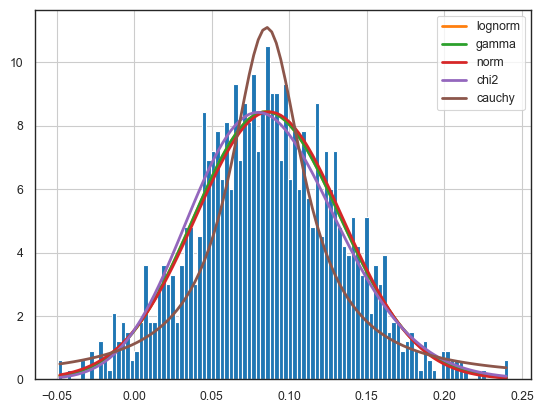

In [202]:
f = Fitter(c_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [203]:
# min and max values
print(np.min(c_synth))
print(np.max(c_synth))

-0.04944322733359349
0.24135880862363465


As the probability distributions match, the next step is to append the data to the new dataframe.

### Append data: chlorides

In [204]:
# What the existing data looks like:
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar
0,9.654646,0.853887,0.252770,1.975630
1,7.983757,0.310202,0.180517,1.928074
2,7.656000,0.375407,0.341703,2.226039
3,8.627140,0.732980,0.118825,2.057216
4,7.760751,0.445233,0.930925,3.335788
...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253
1139,7.478896,0.502475,0.297557,1.955582
1140,8.265878,0.722947,0.582556,1.875342
1141,9.526761,0.604642,0.259037,3.271293


In [205]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Chlorides'] = c_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides
0,9.654646,0.853887,0.252770,1.975630,0.143997
1,7.983757,0.310202,0.180517,1.928074,0.053552
2,7.656000,0.375407,0.341703,2.226039,0.077645
3,8.627140,0.732980,0.118825,2.057216,0.076226
4,7.760751,0.445233,0.930925,3.335788,-0.012649
...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128
1139,7.478896,0.502475,0.297557,1.955582,0.065894
1140,8.265878,0.722947,0.582556,1.875342,0.123611
1141,9.526761,0.604642,0.259037,3.271293,0.081374


### Free sulfur dioxide

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.31it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.034126,1083.574728,-11887.906252,inf,0.069641,2.894512e-05
gamma,0.034126,1083.572118,-11887.905306,inf,0.069643,2.892782e-05
lognorm,0.034476,1052.601577,-11876.240267,inf,0.078054,1.670447e-06
rayleigh,0.038287,1241.776403,-11763.455434,inf,0.113233,3.197448e-13
norm,0.041621,1349.171169,-11668.032123,inf,0.109704,1.954711e-12


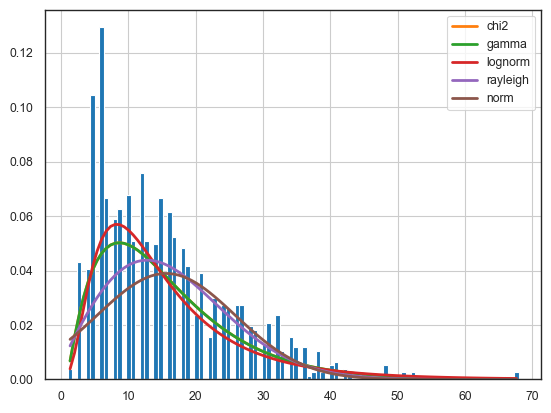

In [206]:
freeSulfurDioxide = df["free sulfur dioxide"].values
f = Fitter(freeSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [207]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'chi2': {'df': 4.23469841724244,
  'loc': 0.8228975231822295,
  'scale': 3.49317418851531}}

From the data above, using five decimal places, the chisquared distribution is equivalent to the Gamma distribution, so once again that will be used to generate the data.

In order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

In [208]:
mean_fsd, std_fsd = 15.615486, 10.250486
shape = (mean_fsd**2) / (std_fsd**2)
scale = (std_fsd**2)/mean_fsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 2.320716537006009
The scale is: 6.728734746788925


### synthetic data: free sulfur dioxide

In [212]:
df["free sulfur dioxide"].describe()

count    1143.000000
mean       15.615486
std        10.250486
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64

mean: 15.6155
std:  10.2505


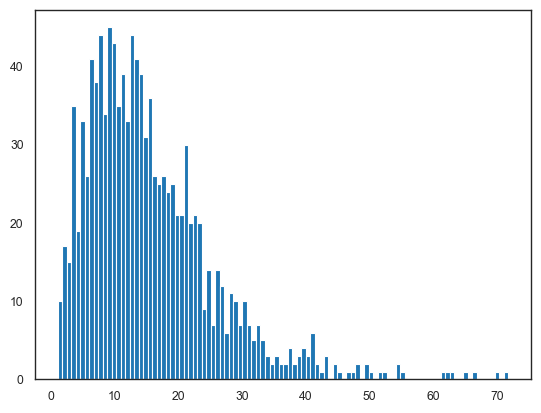

In [209]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
fsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
fsd_synth = (fsd_synth - np.mean(fsd_synth)) / np.std(fsd_synth)

# get desired mean + std
fsd_synth = (fsd_synth * std_fsd) + mean_fsd

plt.hist(fsd_synth, bins=100)
print(f"mean: {np.mean(fsd_synth):.4f}")
print(f"std:  {np.std(fsd_synth):.4f}")

### Check the synthesised data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.74it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.001497,1129.637750,-15461.390661,inf,0.019704,7.588009e-01
chi2,0.001497,1129.634883,-15461.389092,inf,0.019705,7.587157e-01
lognorm,0.001576,1106.387456,-15402.530525,inf,0.021019,6.853323e-01
rayleigh,0.003128,1325.454032,-14626.349054,inf,0.084653,1.418826e-07
exponpow,0.005925,1221.330971,-13889.218731,inf,0.076034,3.413137e-06


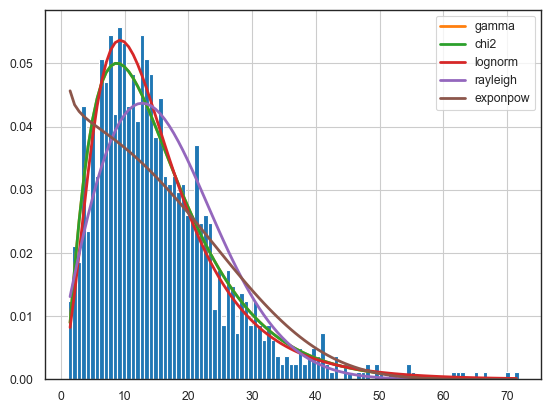

In [210]:
f = Fitter(fsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [211]:
# min and max values
print(np.min(fsd_synth))
print(np.max(fsd_synth))

1.0939220976574688
71.79864704373074


As the synthesised data matches the probability distribution of the original data, the next step is to append it to the new dataframe.

### Append data

In [213]:
# What the existing data looks like:
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides
0,9.654646,0.853887,0.252770,1.975630,0.143997
1,7.983757,0.310202,0.180517,1.928074,0.053552
2,7.656000,0.375407,0.341703,2.226039,0.077645
3,8.627140,0.732980,0.118825,2.057216,0.076226
4,7.760751,0.445233,0.930925,3.335788,-0.012649
...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128
1139,7.478896,0.502475,0.297557,1.955582,0.065894
1140,8.265878,0.722947,0.582556,1.875342,0.123611
1141,9.526761,0.604642,0.259037,3.271293,0.081374


In [214]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Free Sulfur Dioxide'] = fsd_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797
...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149


### Total sulfur dioxide

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.53it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000294,1573.876081,-17322.314074,inf,0.040887,4.257391e-02
lognorm,0.000305,1460.024034,-17280.643635,inf,0.046468,1.390674e-02
exponpow,0.000721,1889.871767,-16296.899244,inf,0.071952,1.365823e-05
expon,0.000763,1450.360927,-16238.634179,inf,0.097630,6.187237e-10
rayleigh,0.000851,2167.622277,-16114.591485,inf,0.130048,2.583632e-17


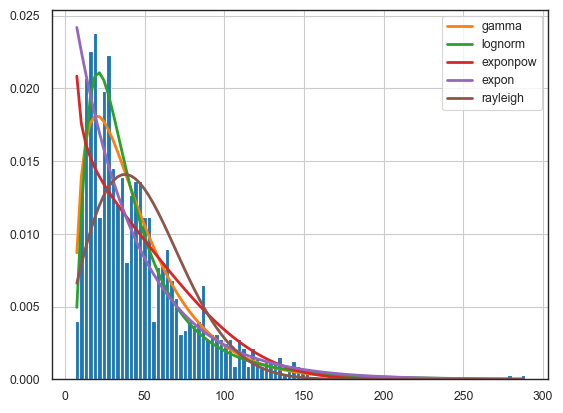

In [215]:
totalSulfurDioxide = df["total sulfur dioxide"].values
f = Fitter(totalSulfurDioxide,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [216]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.5405994629162971,
  'loc': 5.938952202291391,
  'scale': 25.948179556001335}}

The probability distribution for the ***total sulfur dioxide*** is the Gamma distribution and that's what will be used to generate synthetic data for that variable.

As with the previous variable, in order to determine the shape and scale parameters for the gamma distribution, the mean ($\mu$) and the standard deviation ($\sigma$) are needed.

Shape = $\frac{\mu^2}{\sigma^2}$ 

Scale = $\frac{\sigma^2}{\mu}$

These values were obtained in [Basic statistics](#Basic-statistics) in the early stages of exploratory data analysis of this notebook.

### synthesised data: total sulfur dioxide

In [219]:
df["total sulfur dioxide"].describe()

count    1143.000000
mean       45.914698
std        32.782130
min         6.000000
25%        21.000000
50%        37.000000
75%        61.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [222]:
mean_tsd, std_tsd = df["total sulfur dioxide"].mean(), df["total sulfur dioxide"].std()
shape = (mean_tsd**2) / (std_tsd**2)
scale = (std_tsd**2)/mean_tsd
print(f'The shape is: {shape}')
print(f'The scale is: {scale}')

The shape is: 1.9616843294721298
The scale is: 23.405752634566266


mean: 45.9147
std:  32.7821


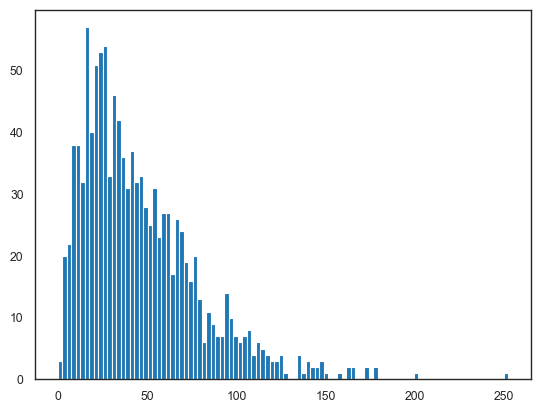

In [223]:
# Generate a random gamma distribution using the values for 
# shape and scale above with the samples needed
# 
tsd_synth = np.random.gamma(shape, scale, 1143)

# standardisation to get mean = 0, std = 1
tsd_synth = (tsd_synth - np.mean(tsd_synth)) / np.std(tsd_synth)

# get desired mean + std
tsd_synth = (tsd_synth * std_tsd) + mean_tsd

plt.hist(tsd_synth, bins=100)
print(f"mean: {np.mean(tsd_synth):.4f}")
print(f"std:  {np.std(tsd_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 34.27it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.000131,1452.040265,-18244.419503,inf,0.023224,5.604454e-01
gamma,0.000131,1452.041404,-18244.417110,inf,0.023225,5.603987e-01
lognorm,0.000157,1395.491925,-18037.560004,inf,0.032775,1.677924e-01
rayleigh,0.000397,1770.822514,-16985.405920,inf,0.097877,5.535180e-10
exponpow,0.000490,1744.420857,-16737.794639,inf,0.060695,4.205635e-04


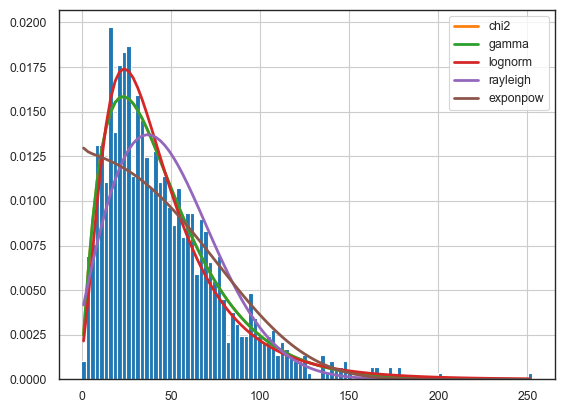

In [224]:
f = Fitter(tsd_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [221]:
# min and max values
print(np.min(tsd_synth))
print(np.max(tsd_synth))

0.31907364613547173
288.4885519123381


As the synthesised data for the ***total sulfur dioxide*** matches the original data, the next stage is to append the data to the new dataframe.

### Append data

In [225]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Total Sulfur Dioxide'] = tsd_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708,21.078930
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804,11.300240
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900,44.260042
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160,33.055281
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797,54.802857
...,...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020,22.343462
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577,36.423046
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031,77.981906
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149,7.170697


### Density

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.32it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,102329.821618,-642.949703,5158.388892,inf,0.040328,0.047256
gamma,102380.387314,-643.105925,5158.953560,inf,0.039758,0.052474
norm,103564.475548,-644.791441,5165.055741,inf,0.043950,0.023452
rayleigh,122827.955265,inf,5360.040417,inf,0.047168,0.011965
cauchy,144477.356406,-699.361665,5545.592927,inf,0.063031,0.000217


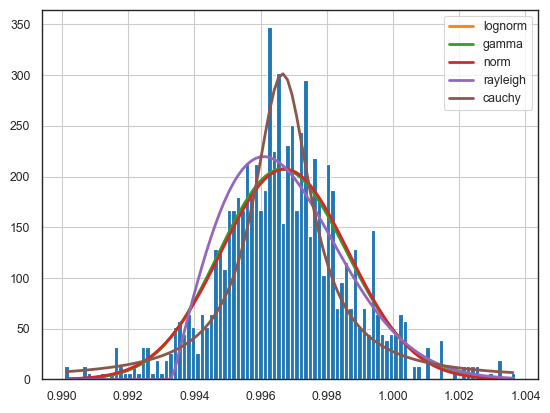

In [226]:
density = df["density"].values
f = Fitter(density,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [227]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.0231931248746051,
  'loc': 0.9138082551620588,
  'scale': 0.08289870127360321}}

The lognormal distribution is the best-fitting probability distribution for the ***density*** variable.

### Synthesised data: density

In [228]:
#reminder of the statistics for the column "density"
df.density.describe()

count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

In [229]:
std_d = df.density.std()
mean_d = df.density.mean()

mean: 0.9967
std:  0.0019


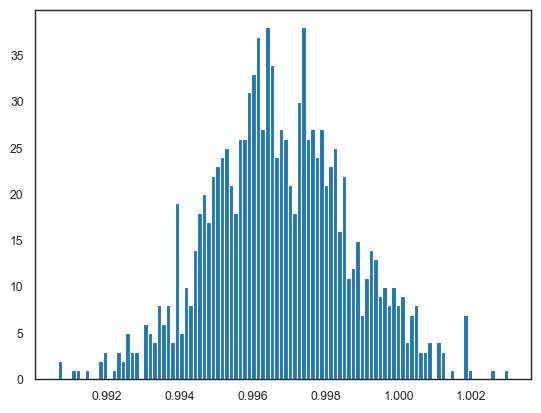

In [230]:
# fa_synth is the fixed acidity, synthesised data
d_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
d_synth = (d_synth - np.mean(d_synth)) / np.std(d_synth)

# get desired mean + std
d_synth = (d_synth * std_d) + mean_d

plt.hist(d_synth, bins=100)
print(f"mean: {np.mean(d_synth):.4f}")
print(f"std:  {np.std(d_synth):.4f}")

Now check the data

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.37it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,57150.801783,-716.568553,4492.582566,inf,0.021458,6.603693e-01
gamma,57808.738282,-716.138669,4505.665945,inf,0.025358,4.469600e-01
norm,59210.465679,-718.139838,4526.008945,inf,0.029865,2.546840e-01
cauchy,144027.677770,-738.430377,5542.029848,inf,0.074686,5.441668e-06
rayleigh,144365.627118,inf,5544.708664,inf,0.118127,2.358476e-14


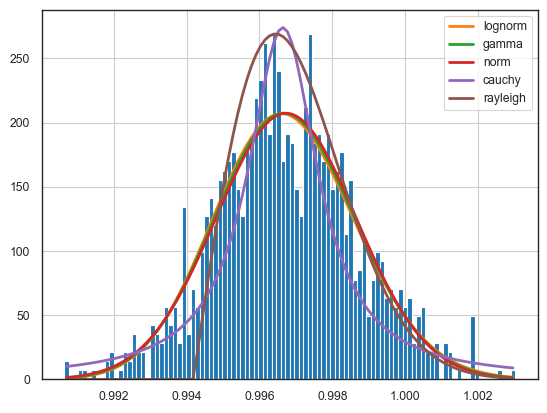

In [231]:
f = Fitter(d_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [232]:
# min and max values
print(np.min(d_synth))
print(np.max(d_synth))

0.9906442614396714
1.0030196873058346


As it's a lognormal distribution, the next stage is to append it to the dataframe that contains the rest of the synthesised data.

### Append data

In [233]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Density'] = d_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708,21.078930,0.994689
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804,11.300240,1.001287
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900,44.260042,0.994567
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160,33.055281,0.998567
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797,54.802857,0.996582
...,...,...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020,22.343462,0.997160
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577,36.423046,0.999254
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031,77.981906,0.993072
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149,7.170697,0.998469


### pH

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.48it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,31.102837,368.045508,-4098.376503,inf,0.039481,0.055181
gamma,31.110760,369.307168,-4098.085360,inf,0.039997,0.050229
norm,31.169029,381.720369,-4102.987989,inf,0.046276,0.014486
chi2,31.457147,363.517020,-4085.429527,inf,0.041992,0.034505
rayleigh,34.252542,inf,-3995.162120,inf,0.047113,0.012109


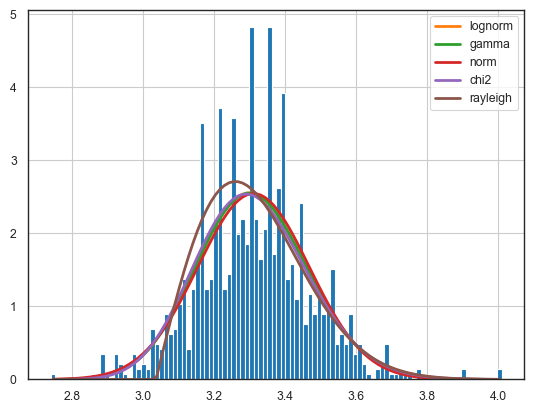

In [234]:
pH = df["pH"].values
f = Fitter(pH,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [235]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.04987881220975432,
  'loc': 0.17615195311598159,
  'scale': 3.1309642987432946}}

The lognormal distribution is the best-fitting probability distribution for the ***pH*** variable, so that's what will be used to synthesise the data.

### Synthesised data: pH

In [236]:
#reminder of the statistics for the column "pH"
df.pH.describe()

count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [237]:
std_pH = df.pH.std()
mean_pH = df.pH.mean()

mean: 3.3110
std:  0.1567


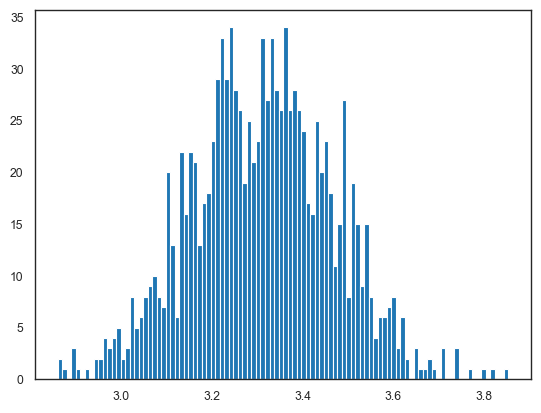

In [238]:
# fa_synth is the fixed acidity, synthesised data
pH_synth = lognorm.rvs(0.025, 0, 1, size=1143)

# standardisation to get mean = 0, std = 1
pH_synth = (pH_synth - np.mean(pH_synth)) / np.std(pH_synth)

# get desired mean + std
pH_synth = (pH_synth * std_pH) + mean_pH

plt.hist(pH_synth, bins=100)
print(f"mean: {np.mean(pH_synth):.4f}")
print(f"std:  {np.std(pH_synth):.4f}")

Check the synthesised data.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.96it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,9.695816,162.393889,-5437.703982,inf,0.018284,0.832441
gamma,9.695956,161.777334,-5430.646054,inf,0.015897,0.930355
lognorm,9.699507,161.474262,-5430.227480,inf,0.015511,0.942122
chi2,10.914273,148.934775,-5295.357670,inf,0.039953,0.050637
exponpow,14.577631,210.400320,-4964.554216,inf,0.051347,0.004651


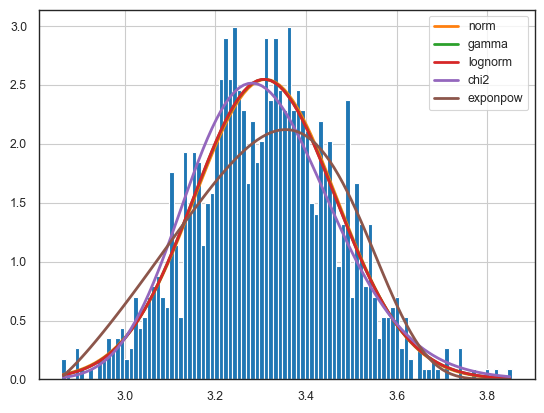

In [239]:
f = Fitter(pH_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [241]:
# min and max values
print(np.min(pH_synth))
print(np.max(pH_synth))

2.859075982037819
3.854966278323243


As the probability distributions and minimum and maximum values match, the next stage is to append the data.

### Append data

In [240]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['pH'] = pH_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708,21.078930,0.994689,3.181418
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804,11.300240,1.001287,3.296054
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900,44.260042,0.994567,3.255168
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160,33.055281,0.998567,3.188026
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797,54.802857,0.996582,3.426895
...,...,...,...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020,22.343462,0.997160,3.351511
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577,36.423046,0.999254,3.478480
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031,77.981906,0.993072,3.279503
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149,7.170697,0.998469,3.452469


### Sulphates

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.70it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,16.582935,646.171436,-4817.237659,inf,0.053279,2.924855e-03
gamma,19.515122,808.447413,-4631.139506,inf,0.074580,5.643112e-06
cauchy,22.393052,435.916575,-4480.948626,inf,0.112153,5.598255e-13
rayleigh,24.820764,inf,-4363.299824,inf,0.114257,1.870145e-13
norm,35.824969,1521.902468,-3943.859343,inf,0.129802,2.993513e-17


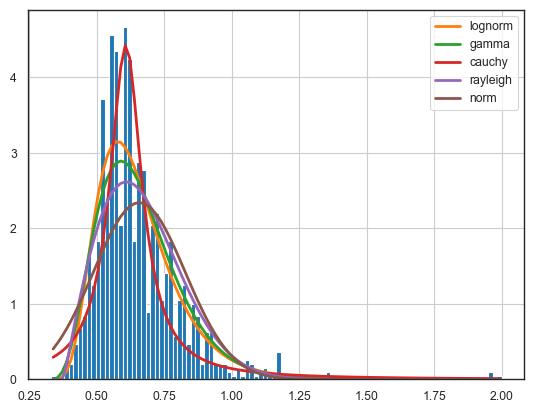

In [242]:
sulphates = df["sulphates"].values
f = Fitter(sulphates,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [243]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.39765079440234896,
  'loc': 0.28388853658643187,
  'scale': 0.34424385004467967}}

### Synthesised data: sulphates

In [244]:
# Reminder of the basic statistics for the sulphates variable.
df.sulphates.describe()

count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [245]:
std_s = df.sulphates.std()
mean_s = df.sulphates.mean()

mean: 0.6577
std:  0.1704


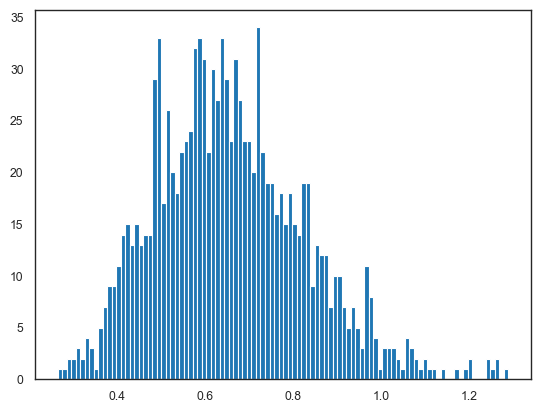

In [246]:
# random.lognormal was used this time as the 
# probability distribution wasn't matching the original
s_synth = random.lognormal(mean=mean_s, sigma=std_s, size=1143)

# standardisation to get mean = 0, std = 1
s_synth = (s_synth - np.mean(s_synth)) / np.std(s_synth)

# get desired mean + std
s_synth = (s_synth * std_s) + mean_s

plt.hist(s_synth, bins=100)
print(f"mean: {np.mean(s_synth):.4f}")
print(f"std:  {np.std(s_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.68it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,7.030187,147.107168,-5798.115442,inf,0.014237,0.972119
lognorm,7.056718,146.326342,-5793.810016,inf,0.016207,0.920021
rayleigh,7.845399,inf,-5679.753922,inf,0.033042,0.161166
norm,9.346377,182.921653,-5479.658510,inf,0.040452,0.046180
exponpow,15.266010,170.493513,-4911.815571,inf,0.062143,0.000280


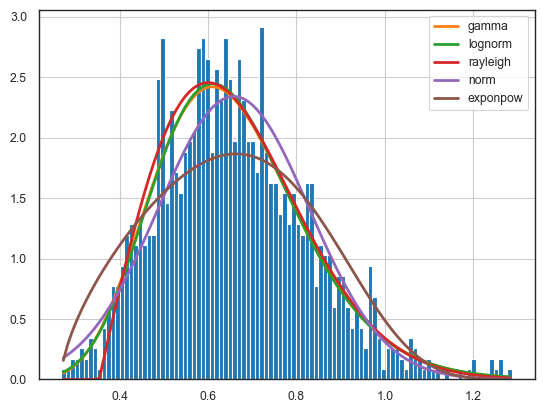

In [247]:
f = Fitter(s_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [248]:
# min and max values
print(np.min(s_synth))
print(np.max(s_synth))

0.2664342216375357
1.2883828799575379


As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [249]:
# Add a new column name, assign list of values 
# and append to dataframe
df2['Sulphates'] = s_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708,21.078930,0.994689,3.181418,0.500026
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804,11.300240,1.001287,3.296054,0.474126
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900,44.260042,0.994567,3.255168,0.701350
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160,33.055281,0.998567,3.188026,0.643843
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797,54.802857,0.996582,3.426895,0.605684
...,...,...,...,...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020,22.343462,0.997160,3.351511,0.684511
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577,36.423046,0.999254,3.478480,0.588103
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031,77.981906,0.993072,3.279503,0.989767
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149,7.170697,0.998469,3.452469,0.626536


### Alcohol

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.26it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,3.574221,543.267651,-6571.316108,inf,0.079198,1.105040e-06
gamma,3.643868,548.112632,-6549.258146,inf,0.084331,1.607735e-07
rayleigh,3.772686,549.937564,-6516.589778,inf,0.084266,1.648608e-07
norm,4.170972,629.050185,-6401.876184,inf,0.125816,3.134741e-16
cauchy,4.305494,557.052952,-6365.594163,inf,0.169352,3.976650e-29


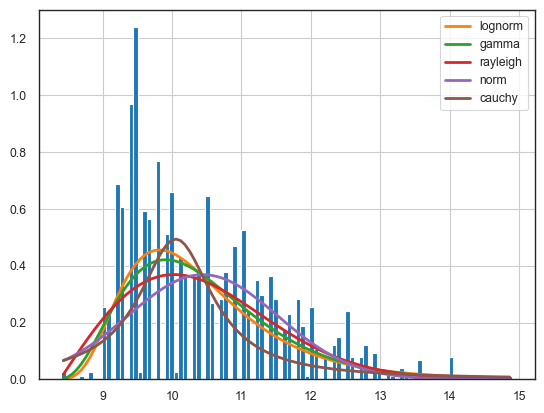

In [250]:
alcohol = df["alcohol"].values
f = Fitter(alcohol,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [251]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.4515446424218206,
  'loc': 8.067865159018577,
  'scale': 2.1467011211043987}}

### Synthesised data: alcohol

In [252]:
# Reminder of the basic statistics for the alcohol variable.
df.alcohol.describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [253]:
std_a = df.alcohol.std()
mean_a = df.alcohol.mean()
std_a, mean_a

(1.0821956098764456, 10.44211140274131)

mean: 10.4421
std:  1.0822


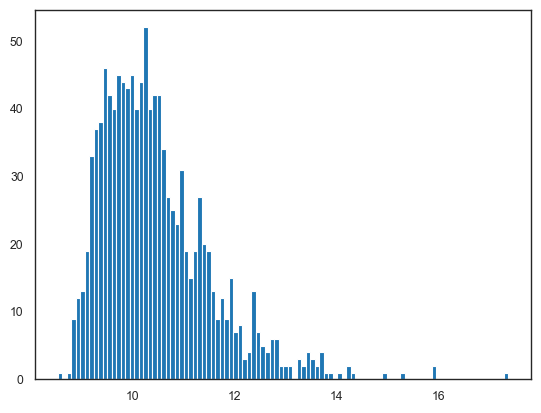

In [254]:
a_synth = lognorm.rvs(s=0.4515,loc=8.067865,scale=2.1467, size=1143)

# standardisation to get mean = 0, std = 1
a_synth = (a_synth - np.mean(a_synth)) / np.std(a_synth)

# get desired mean + std
a_synth = (a_synth * std_a) + mean_a

plt.hist(a_synth, bins=100)
print(f"mean: {np.mean(a_synth):.4f}")
print(f"std:  {np.std(a_synth):.4f}")

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.88it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.077987,763.345235,-10943.244121,inf,0.015423,9.446435e-01
gamma,0.084750,835.367751,-10848.188821,inf,0.025556,4.370798e-01
rayleigh,0.172389,inf,-10043.647794,inf,0.072062,1.317281e-05
cauchy,0.390130,703.801194,-9110.127217,inf,0.124941,5.197534e-16
norm,0.403903,1300.361637,-9070.472379,inf,0.095021,1.964093e-09


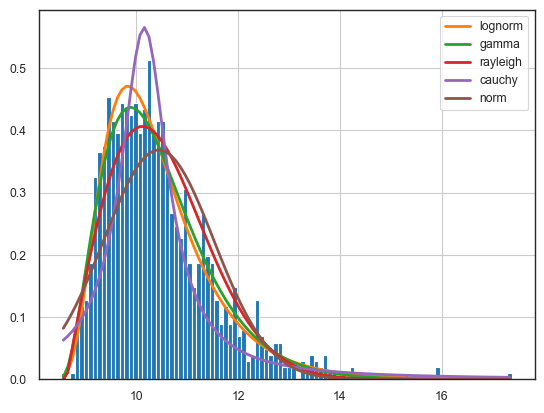

In [255]:
f = Fitter(a_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [257]:
# min and max values
print(np.min(a_synth))
print(np.max(a_synth))

8.522835105906877
17.38287143854452


As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [258]:
df2['Alcohol'] = a_synth
df2

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,9.654646,0.853887,0.252770,1.975630,0.143997,5.017708,21.078930,0.994689,3.181418,0.500026,11.920411
1,7.983757,0.310202,0.180517,1.928074,0.053552,11.300804,11.300240,1.001287,3.296054,0.474126,12.387424
2,7.656000,0.375407,0.341703,2.226039,0.077645,9.248900,44.260042,0.994567,3.255168,0.701350,10.468995
3,8.627140,0.732980,0.118825,2.057216,0.076226,15.852160,33.055281,0.998567,3.188026,0.643843,10.420226
4,7.760751,0.445233,0.930925,3.335788,-0.012649,4.505797,54.802857,0.996582,3.426895,0.605684,10.695703
...,...,...,...,...,...,...,...,...,...,...,...
1138,5.394586,0.563727,0.036101,1.930253,0.091128,8.309020,22.343462,0.997160,3.351511,0.684511,10.019297
1139,7.478896,0.502475,0.297557,1.955582,0.065894,41.743577,36.423046,0.999254,3.478480,0.588103,11.214442
1140,8.265878,0.722947,0.582556,1.875342,0.123611,7.804031,77.981906,0.993072,3.279503,0.989767,8.874594
1141,9.526761,0.604642,0.259037,3.271293,0.081374,17.580149,7.170697,0.998469,3.452469,0.626536,10.121670


### Quality

From looking at [Visual summary of variables](#Visual-summary-of-variables), the variable **quality** is the only one that isn't a chemical compound, therefore the scoring or grading of the wines has been done manually and thus this variable shouldn't be run through a library to determine the probability distribution.

However, for the purpose of the exercise, I will run through the process.

It would be better to now see which variables are correlated with a better score or grade of wine.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.82it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,136.315637,503.422504,-2409.395091,inf,0.236450,1.061016e-56
lognorm,136.360501,491.483161,-2409.018976,inf,0.246681,9.607671e-62
gamma,136.363912,490.033263,-2408.990383,inf,0.246664,9.800761e-62
norm,136.433731,469.404728,-2415.446718,inf,0.249364,4.194621e-63
rayleigh,136.469459,inf,-2415.147445,inf,0.348588,1.242524e-124


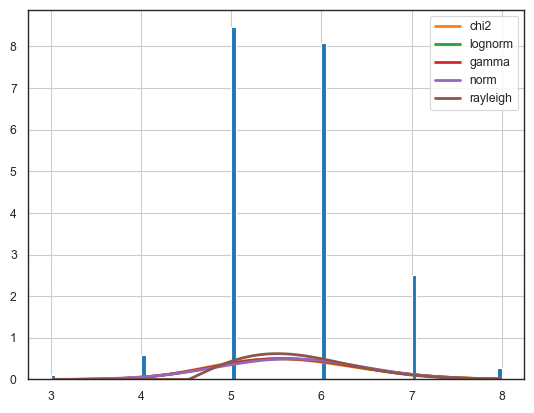

In [259]:
# run through the 'fitter' dataset
quality = df["quality"].values
f = Fitter(quality,
           distributions=get_common_distributions())
f.fit()
f.summary()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20.36it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,136.360501,491.483161,-2409.018976,inf,0.246681,9.607671e-62
loguniform,143.461551,inf,-2343.953232,NaN,1.000000,0.000000e+00


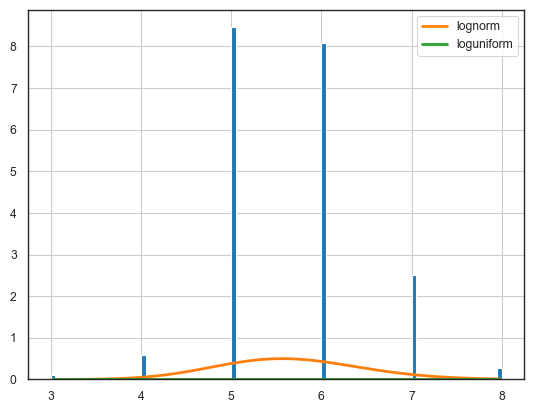

In [261]:
quality = df["quality"].values
f = Fitter(quality)
# Specify the range of distributions where lognormal is
f.distributions = f.distributions[64:66]
# Specify lognormal distribution
#f = Fitter(residualSugar,distributions=["lognormal"])
f.fit()
f.summary()

In [262]:
# Get the best distribution using sum squared error.
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.07669309717239106,
  'loc': -4.816680487346126,
  'scale': 10.442946475764781}}

### Synthesised data: quality

In [263]:
# reminder of the original data
df.quality.describe()

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [264]:
# standard deviation and mean
std_q = df.quality.std()
mean_q = df.quality.mean()

In [ ]:
# Synthesise the lognormal distribution for the 'quality' variable.
# Generate s
#s_gen_q = np.random.lognormal(mean_q, std_q, 1143)

q_synth = lognorm.rvs(s=std_q, loc=0.89515,scale=0.06999, size=1143)

# standardisation to get mean = 0, std = 1
q_synth = (q_synth - np.mean(q_synth)) / np.std(q_synth)

# get desired mean + std
q_synth = (q_synth * std_q) + mean_q

plt.hist(q_synth, bins=100)
print(f"mean: {np.mean(q_synth):.4f}")
print(f"std:  {np.std(q_synth):.4f}")

In [ ]:
f = Fitter(q_synth,
           distributions=get_common_distributions())
f.fit()
f.summary()

As the probability distributions match, the next stage is to append the data to the new dataframe.

### Append data

In [ ]:
df2['Quality'] = q_synth
df2

## Variables and quality

Now to look at quality in a bit more detail and see the variation across the dataset.

In [ ]:
#Define inputs and output
X=df.drop(['quality'],axis=1)
y=df['quality']
# Set the plot size
fig,ax=plt.subplots(figsize=(20,5))
# Title
ax.set_title('Quality across dataset', fontsize=15)
sns.countplot(x=y, palette='magma');

It can be see from above that the majority of wines are graded 5 and 6, whereas only very few (approx 25) are graded 8.

The next stage would be to plot the variables against quality to see if there's any correlation with quality - specifically, looking at the variables with respect to grades 7 and 8.

In [ ]:
# Remove 'quality' as quality vs. quality doesn't need to be plotted.
wine_variables.pop()

In [ ]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in wine_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=df['quality'], y=df[variable], palette='magma')
    #plt.show()

### Observations of variables versus quality

Summarising the observations from the boxplots above (in particular at wines graded 7 or 8):
- Very low range of volatile acidity (8 has the lowest value and range).
- Citric acid higher overall in 7 and 8.
- Chlorides at the lowest level and tightest range for 8 (approx 0.75).
- Grade 8 wines have a lower overall value and tighter range for density.
- Grade 8 wines have the lowest pH and tightest range.
- Higher level of sulphates with grade 8 wines
- Alcohol at the highest level for grade (median approx. 12%)

### A different way to observe variables versus quality

To-do:
- explain the normalisation/accuracy
- explain the naming convention with the coding
- Add links to references for Numpy code, stackexchange

In [ ]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

for col in list(df.columns[:-2]):    
    plt.figure(figsize=(20,10))
    sns.lineplot(data=df, x="quality",y=col, color=randomcolor())
    plt.show()

### Correlations

Increases in the following variables correspond to an increase in quality (positive correlation):

- *Fixed acidity*
- *Citric acid* 
- *Sulphates*
- *Alcohol*

Decreases in the following variables correspond to an increase in quality (negative correlation):
- *Volatile acidity*
- *Chlorides*
- *Density* (below 0.996)
- *pH* (below 3.3)

### Correlation between variables and quality

If visualing the relationship between the variables and quality was undesired, then the correlation function in pandas could be used instead:

In [ ]:
#correlation = train.corr()
print(df.corr()['quality'].sort_values(ascending = False),'\n')

## Conclusion

- mention exploratory data analysis (EDA)
- mention probability distributions
- mention correlation of variables and quality

## References

1. [Python Distfit package](https://pythonawesome.com/distfit-probability-density-fitting/)
2. [Definition of Generalised Extreme Value Distribution](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)
3. [Definition of Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution)
4. [Definition of Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
5. [Python Fitter package](https://pypi.org/project/fitter/)
6. [Ways to use the describe() function](https://www.statology.org/pandas-describe/)
7. [Using Pandas to find Kurtosis](https://pythontic.com/pandas/dataframe-computations/kurtosis#:~:text=Kurtosis%20function%20in%20pandas%3A%201%20The%20pandas%20DataFrame,a%20normal%20distribution%20has%20a%20kurtosis%20of%200.)
8. [Performance comparison for column header lists](https://datatofish.com/list-column-names-pandas-dataframe/#:~:text=Here%20are%20two%20approaches%20to%20get%20a%20list,example%2C%20let%E2%80%99s%20create%20a%20DataFrame%20with%203%20columns%3A)
9. [Scipy lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html?highlight=lognormal)
10. [Changing Column headers in pandas](https://medium.com/swlh/pandas-different-ways-of-formatting-column-headers-aec6889d1881)
11. [Generating lognormal data](https://stackoverflow.com/questions/68361048/how-to-generate-lognormal-distribution-with-specific-mean-and-std-in-python)
12. [The Chi Squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution#:~:text=The%20chi-squared%20distribution%20is%20used%20in%20the%20common,a%20normal%20distribution%20from%20a%20sample%20standard%20deviation.)
13. [Adding a column in pandas](https://datascienceparichay.com/article/pandas-add-column-to-dataframe/#:~:text=Pandas%20%E2%80%93%20Add%20Column%20to%20Existing%20DataFrame%201,dataframe%20assign%20%28%29%20function%20...%204%20Summary%20)
14.[Definition of Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)
15.[How to determine the shape and scale for a gamma distribution](https://math.stackexchange.com/questions/2873763/is-it-possible-to-determine-shape-and-scale-for-a-gamma-distribution-from-a-mean#:~:text=If%20you%20know%20the%20mean%20is%20%CE%BC%20and,making%20the%20corresponding%20rate%20parameter%20%CE%BC%20%CF%83%202)
16. [Numpy's documentation to generate the Gamma distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
17. [Definition of Powerlaw distribution](https://en.wikipedia.org/wiki/Power_law)
18. [Numpy's documentation for powerlaw distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html)
19. [Definition of the Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution)
20. [Pandas documentation - describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
21. [Pandas documentation - corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
22. [Why log transformation doesn't always work](https://datascience.stackexchange.com/questions/46763/why-does-not-log-transformation-make-the-data-normalized)
23. [Quantile Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)